# MIT License

Copyright (c) 2023 Thranathi Reddy Chada

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

# **Model Interpretability**

# Aim:

In this assignment we aim to interpret the results of

Linear Model

Tree Based Model

Best model of AutoML H2O

Using different Model Interpretibility Methods.

In this excercise I have used

SHAP analysis

LIME analysis

Partial Dependence Plot Analysis

# Variable Description
Address: The physical address of the hotel, including street name, number, and any other relevant details.

Area: The sub-city region where the hotel is located geographically.

city: The city where the hotel is located.

guest_recommendation: The number of guests who have stayed at this hotel and recommended it to others on the website.

latitude: The geographical latitude of the hotel's location.

longitude: The geographical longitude of the hotel's location.

property_id: A unique identifier assigned to the hotel.

property_name: The name of the hotel.

property_type: The type of property, which is typically a hotel.

room_count: The total number of rooms available for guests at the hotel.

room_type: The type of room available for guests at the hotel.

site_review_count: The number of reviews left on the website by users for this hotel.

site_review_rating: The overall rating given by users for this hotel on the website.

state: The state or province where the hotel is located.

uniq_id: A unique identifier assigned to each hotel on the website.

In [1]:
# Importing all libraries necessary for the assignment
!pip install shap
!pip install lime
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o
!pip install pydot
!pip install --upgrade scikit-learn
!pip install scipy
!pip3 install -U scikit-learn scipy matplotlib
!pip install -U scikit-learn --user

!pip install --upgrade matplotlib

import pandas as pd
import numpy as np
import shap
import lime
from lime import lime_tabular
import sklearn
from sklearn.model_selection import train_test_split
import random
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence
from matplotlib.pyplot import figure
from sklearn.tree import export_graphviz
import pydot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (32, 24)

In [2]:
import shap

In [3]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [4]:
# Setting up memory
pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

1


In [5]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:31201..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 19.0.2+7-44, mixed mode, sharing)
  Starting server from C:\Users\thran\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\thran\AppData\Local\Temp\tmppb01wqz5
  JVM stdout: C:\Users\thran\AppData\Local\Temp\tmppb01wqz5\h2o_thran_started_from_python.out
  JVM stderr: C:\Users\thran\AppData\Local\Temp\tmppb01wqz5\h2o_thran_started_from_python.err
  Server is running at http://127.0.0.1:31201
Connecting to H2O server at http://127.0.0.1:31201 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


--------------------------  -----------------------------
H2O_cluster_uptime:         03 secs
H2O_cluster_timezone:       America/New_York
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    3 months and 9 days
H2O_cluster_name:           H2O_from_python_thran_rwuui0
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    1.959 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:31201
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.10.9 final
--------------------------  -----------------------------

In [6]:
# Import the processed data from notebook One
data = pd.read_csv("https://raw.githubusercontent.com/thranathi17/dsem_dataset/main/goibibo_com-travel_new.csv")

In [7]:
data.head()

address            area     city  \
0  15th Mile, N.H.21,Manali, District Kullu,Himac...          Others   Manali   
1  A-585, Sushant Lok-1 ,Near Iffco Chowk Metro S...     Sushant Lok  Gurgaon   
2  Cobra Vaddo,Calungate Baga Road, Bardez, Calan...  Calangute Area      Goa   
3                                              Simsa   Village Simsa   Manali   
4         8180 Street No.-6,Arakashan Road,Paharganj       Paharganj    Delhi   

   guest_recommendation                                  hotel_description  \
0                    85  The standard check-in time is 12:00 PM and the...   
1                    87  The standard check-in time is 12:00 PM and the...   
2                    50  The standard check-in time is 12:00 PM and the...   
3                   100  The standard check-in time is 12:00 PM and the...   
4                    63  The standard check-in time is 12:00 PM and the...   

                                    hotel_facilities   latitude  \
0  Doctor on Call|Dry Cleaning|Laundry Service Av...  32.139387   
1  Airport Transfer Available / Surcharge|Banquet...  28.472097   
2  Swimming Pool|Bar / Lounge |Laundry Service Av...  15.548398   
3  Doctor on Call|Dry Cleaning|Laundry Service Av...  32.223603   
4  Internet Access - Surcharge|Laundry Service Av...  28.646777   

         locality  longitude       property_id        property_name  \
0          Others  77.154660  HTLGBO1000016238     Baragarh Regency   
1     Sushant Lok  77.072546  HTLGBO1000015822  Asian Suites A- 585   
2  Calangute Area  73.757634  HTLGBO1000004551        Bevvan Resort   
3   Village Simsa  77.185900  HTLGBO1000007993    Apple Inn Cottage   
4       Paharganj  77.212735  HTLGBO1000008281  Anmol Hotel Pvt.Ltd   

  property_type province  room_count                   room_type  \
0        Resort   Manali          17                 Deluxe Room   
1   Guest House  Gurgaon          18  Deluxe Room With Free WIFI   
2        Resort      Goa          15               Standard Room   
3       Cottage   Manali          24                 Deluxe Room   
4         Hotel    Delhi          20        Standard Room Non AC   

   site_review_count  site_review_rating             state  \
0                 87                 4.0  Himachal Pradesh   
1                  8                 4.5           Haryana   
2                  2                 2.5               Goa   
3                  1                 5.0  Himachal Pradesh   
4                121                 2.8             Delhi   

                            uniq_id  
0  2c8db027d43a9452a43e88eb30d9f983  
1  e98f69f889c0235e6dc480e7df6de0de  
2  9b59d00eaffc273d83000ed7dcda0e83  
3  df0971f9c5501af112485ee28b468ce5  
4  0c3514344c9cda8718f558e84bdb44ef

In [8]:
#Dropping the columns that is not needed for creating predective model

data.drop('province', axis=1 , inplace=True)
data.drop('locality', axis=1, inplace=True)
#dff.drop('address', axis=1, inplace=True)
#dff.drop('hotel_description', axis=1, inplace=True)
#dff.drop('hotel_facilities', axis=1, inplace=True)

In [9]:
#Gettig the list of numerical features
num_cols = data._get_numeric_data().columns
num_cols, len(num_cols)

(Index(['guest_recommendation', 'latitude', 'longitude', 'room_count',
        'site_review_count', 'site_review_rating'],
       dtype='object'),
 6)

In [10]:
#Gettig the list of categorical features
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
cat_cols, len(cat_cols)

(['address',
  'area',
  'city',
  'hotel_description',
  'hotel_facilities',
  'property_id',
  'property_name',
  'property_type',
  'room_type',
  'state',
  'uniq_id'],
 11)

In [11]:
# converting categorical features into numerical
for cat_col in cat_cols:
  classes = list(np.unique(data[cat_col]))
  tokens = []
  i = 0
  for c in classes:
    tokens.append(i)
    i += 1

  data[cat_col].replace(classes, tokens, inplace=True)

In [12]:
data.head()

address  area  city  guest_recommendation  hotel_description  \
0      164   585   214                    85                723   
1      546   798   120                    87                778   
2      830   108   113                    50                510   
3     2017   877   214                   100                723   
4      493   591    87                    63               1262   

   hotel_facilities   latitude  longitude  property_id  property_name  \
0              1132  32.139387  77.154660         1278             43   
1               141  28.472097  77.072546         1268             24   
2              2146  15.548398  73.757634          480             50   
3              1152  32.223603  77.185900          789             13   
4              1620  28.646777  77.212735          810              8   

   property_type  room_count  room_type  site_review_count  \
0             13          17        241                 87   
1              5          18        261                  8   
2             13          15        695                  2   
3              3          24        241                  1   
4              8          20        709                121   

   site_review_rating  state  uniq_id  
0                 4.0     10      396  
1                 4.5      9     2116  
2                 2.5      7     1385  
3                 5.0     10     2013  
4                 2.8      6      115

In [13]:
X = data.drop(["site_review_rating"], axis=1)  # Training Feature
Y = data["site_review_rating"]  # Target

In [14]:
(
    x_train,
    x_test,
    y_train,
    y_test,
) = train_test_split(  # Splitting Data into Training and Test
    X, Y, test_size=0.1, random_state=42
)
x_train_100 = shap.utils.sample(
    x_train, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process
x_test_100 = shap.utils.sample(
    x_test, 100
)  # Taking 100 samples out for SHAP analysis as it is a computationally expensive process

# Fitting a Linear Model

In [15]:
linear_model = sklearn.linear_model.LinearRegression()  # Initializing a Linear Model
linear_model.fit(x_train, y_train)  # Training a linear model


LinearRegression()

In [16]:
# Scaling the data using Min-Max scaling for the purpose of evaluating Co-efficients, as non scaled data may mislead while we evaluate the co-efficients
df = data.drop("site_review_rating", axis=1)
df_norm = (df - df.min()) / (df.max() - df.min())
#df_norm = pd.concat((df_norm, data.site_review_rating), 1)
df_norm = pd.concat([df_norm, data['site_review_rating']], axis=1)

In [17]:
import statsmodels.formula.api as smf  # OLS model Library

results = smf.ols(
    "site_review_rating ~ address + area + city + hotel_description + hotel_facilities + property_id + property_name + property_type + room_type + state + uniq_id + guest_recommendation + latitude + longitude + room_count + site_review_count",
    data=df_norm,
).fit()
print(results.summary())  # OLS Linear Model Summary

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categ

                            OLS Regression Results                            
Dep. Variable:     site_review_rating   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     70.89
Date:                Sat, 02 Dec 2023   Prob (F-statistic):          2.40e-186
Time:                        16:16:52   Log-Likelihood:                -2344.8
No. Observations:                2302   AIC:                             4724.
Df Residuals:                    2285   BIC:                             4821.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.6575 

# Interpreting Regression Co-efficients

# Model Co-efficients

The co-eficient's positive or negative value indicates whether the target and predictors have a positive or negative correlation. A positive value means that when the co-efficient value rises, the target value rises as well, and vice versa. On the other hand, negative values show that when the value of the co-efficient falls, the target value rises, and vice versa.

As can be observed in the above table's co-efficient column

Value for the variable guest_recommendation is highest = 1.9949

Followed by site_review_count = 1.3044

In a linear regression, high absolute values of the co-efficients can be used to estimate the significance of the variables. Here, as previously mentioned, guest_ recommendation and site_review_count appear to be the most significant variables in predicting the objective, which is the hotel industry's site review rating.

Additionally, it indicates that a higher rating for the hotel is indicated by a higher number of guest recommendations and site reviews.

P-Values

The result is declared significant if the p-value is 0.05 or less; if it is more than 0.05, the result is not significant.

hotel_description
property_id
property_name
guest_recommendation
site_review_count

Given that these variables' P-Values are less than 0.05, it is reasonable to conclude that they are significant variables with a substantial impact on the desired outcome (Site Rating) from any changes made to them.

Skew and Kurtosis

Skewness tells us the amount and direction of skew(Departure from the central axis) and Kurtosis tells us how tall and sharp the central peak is. Since 0 is the ideal value for these two metrics, our values for Skew and Kurtosis are, respectively, -0.876 and 7.762.

Durbin-Watson

A statistical tool for identifying auto-correlation in regression analysis residuals is the Durbin-Watson test. It has a range of 0–4.

A value of 2 denotes the absence of autocorrelation.
A value ranging from 0 to 2 signifies the presence of positive autocorrelation.
A value ranging from 2 to 4 signifies the presence of negative autocorrelation.
Our model has a DW score of 1.996 which could be interpreted as a positive auto-correlation in the residuals of regression.

Jarque-Bera Test

Regardless of whether the data represents kurtosis or skew, the JB test is referred to as the test of normalcy. It indicates that the data do not have a normal distribution if it is far from zero. Our JB value of 2469.727 supports the interpretation that Skew and Kurtosis provided once more.

In [18]:
# Setting the max_dept to 3 for the purpose of ease of explainbility and readability
tree_model = RandomForestRegressor(max_depth=3, random_state=0, n_estimators=10)
tree_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=10, random_state=0)

# Fit Tree Based Model

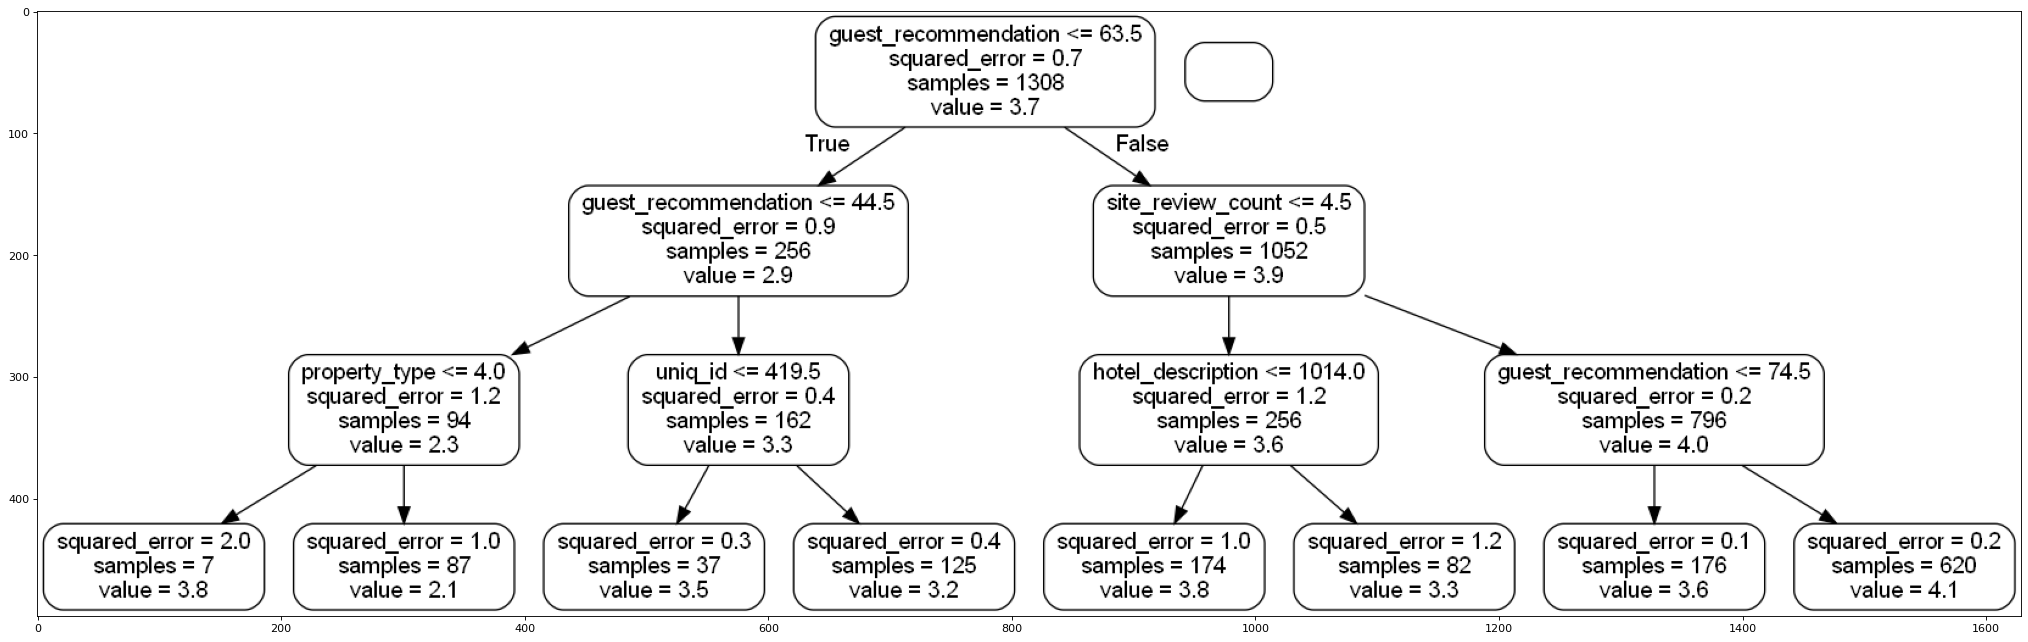

In [19]:
# Visualization of Nodes for the purpose of explainability
figure(figsize=(32, 24), dpi=80)
tree = tree_model.estimators_[0]
export_graphviz(
    tree,
    out_file="tree.dot",
    feature_names=list(x_train.columns),
    rounded=True,
    precision=1,
)
(graph,) = pydot.graph_from_dot_file("tree.dot")
graph.write_png("tree.png")
img = mpimg.imread("tree.png")
imgplot = plt.imshow(img)
plt.show()

# Interpreting Nodes of a Tree-Based Model
The Random Forest Regressor utilizes the idea of the collective wisdom. One of the numerous decision trees used to estimate the target variable is the one shown above. For a given input, every decision tree regression predicts a number as the output. The final result of random forest regression is the average of those predictions.

As usual, the tree has conditions on each internal node and a value associated with each leaf (i.e. the value to be predicted). But additionally, we’ve plotted out the value at each internal node i.e. the mean of the response variables in that region.

The resulting tree visualization shows the structure of the decision tree, with nodes representing splits on different input features, and leaves representing the final predictions for different regions of the feature space.

The initial split is represented by the top node, frequently referred to as the root node. This split is typically based on the feature that has the strongest correlation with the target variable. In this case, guest recommendation is the characteristic at the top node that has the strongest correlation with the target variable.

The conditions on the input features that dictate which branch to take are represented by the edges connecting the nodes. The final predictions for various feature space regions are shown by the leaves. The predicted output value for the corresponding region of the feature space is represented by the values at the bottom of each leaf node.


In [20]:
# Get numerical feature importances
tree_importances = list(tree_model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [
    (feature, round(importance, 2))
    for feature, importance in zip(x_train.columns, tree_importances)
]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

In [21]:
# Print out the feature and importances
[print("Variable: {:20} Importance: {}".format(*pair)) for pair in feature_importances];

Variable: guest_recommendation Importance: 0.85
Variable: site_review_count    Importance: 0.05
Variable: hotel_description    Importance: 0.02
Variable: hotel_facilities     Importance: 0.02
Variable: latitude             Importance: 0.01
Variable: longitude            Importance: 0.01
Variable: property_id          Importance: 0.01
Variable: property_type        Importance: 0.01
Variable: state                Importance: 0.01
Variable: address              Importance: 0.0
Variable: area                 Importance: 0.0
Variable: city                 Importance: 0.0
Variable: property_name        Importance: 0.0
Variable: room_count           Importance: 0.0
Variable: room_type            Importance: 0.0
Variable: uniq_id              Importance: 0.0


The variable importance we get from the tree-based regressor re-inforces our interpretation from the linear model.

# Getting best model using H2O AutoML

In [22]:
data_hf = h2o.H2OFrame(data)  # Converting Pandas dataframe in H2O dataframe

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [23]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df_train, df_test = data_hf.split_frame([pct_rows])

In [24]:
# Setting up AutoML
def autoML(df_train, df_test):
    X = df_train.columns
    y = "site_review_rating"

    X.remove(y)  # Removing the result frm our predictors data

    aml = H2OAutoML(max_runtime_secs=222, seed=1)  # Setting of AutoML
    aml.train(
        x=X, y=y, training_frame=df_train
    )  # Trainig the dataset on different models

    return df_train, df_test, aml


# Function to get best model from the AutoML leaderboard
def getBestModel(aml):
    model_index = 0
    glm_index = 0
    glm_model = ""
    aml_leaderboard_df = aml.leaderboard.as_data_frame()
    models_dict = {}

    for m in aml_leaderboard_df["model_id"]:
        models_dict[m] = model_index
        if "StackedEnsemble" not in m:
            break
        model_index = model_index + 1

    for m in aml_leaderboard_df["model_id"]:
        if "GLM" in m:
            models_dict[m] = glm_index
            break
        glm_index = glm_index + 1

    print(model_index)
    best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])
    return best_model


In [25]:
autoML = autoML(df_train, df_test)  # Training AutoML

AutoML progress: |
16:17:00.419: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


In [26]:
autoML[2].leaderboard  # Leaderbord of AutoML output

model_id                                                     rmse       mse       mae     rmsle    mean_residual_deviance
-------------------------------------------------------  --------  --------  --------  --------  ------------------------
StackedEnsemble_AllModels_3_AutoML_1_20231202_161700     0.633625  0.40148   0.436232  0.160201                  0.40148
StackedEnsemble_BestOfFamily_4_AutoML_1_20231202_161700  0.635153  0.403419  0.438533  0.160567                  0.403419
StackedEnsemble_AllModels_4_AutoML_1_20231202_161700     0.635536  0.403906  0.437897  0.160649                  0.403906
GBM_grid_1_AutoML_1_20231202_161700_model_20             0.637378  0.406251  0.445305  0.162695                  0.406251
StackedEnsemble_BestOfFamily_5_AutoML_1_20231202_161700  0.637825  0.406821  0.440102  0.161434                  0.406821
StackedEnsemble_BestOfFamily_7_AutoML_1_20231202_161700  0.638381  0.40753   0.44085   0.161982                  0.40753
StackedEnsemble_AllModels_2_AutoML_1_20231202_161700     0.638551  0.407747  0.440684  0.162155                  0.407747
StackedEnsemble_AllModels_6_AutoML_1_20231202_161700     0.638764  0.408019  0.439538  0.161749                  0.408019
StackedEnsemble_AllModels_1_AutoML_1_20231202_161700     0.639014  0.408338  0.441028  0.161976                  0.408338
StackedEnsemble_BestOfFamily_2_AutoML_1_20231202_161700  0.643108  0.413588  0.443381  0.163688                  0.413588
[60 rows x 6 columns]

In [27]:
autoML_model = getBestModel(autoML[2])  # Getting Best Model
print(autoML_model)

3
Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20231202_161700_model_20


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    65                 65                          13093                  4            4            4             7             16            11.4

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.2885735809455582
RMSE: 0.5371904512792071
MAE: 0.37961445296964336
RMSLE: 0.1388647572369176
Mean Residual Deviance: 0.2885735809455582

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.4062506546984405
RMSE: 0.6373779527866025
MAE: 0.44530503388539006
RMSLE: 0.16269509976358904
Mean Residual Devianc

# SHAP, Partial Dependence Plot, Individual Conditional Expectation Analysis for AutoML Best Model

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

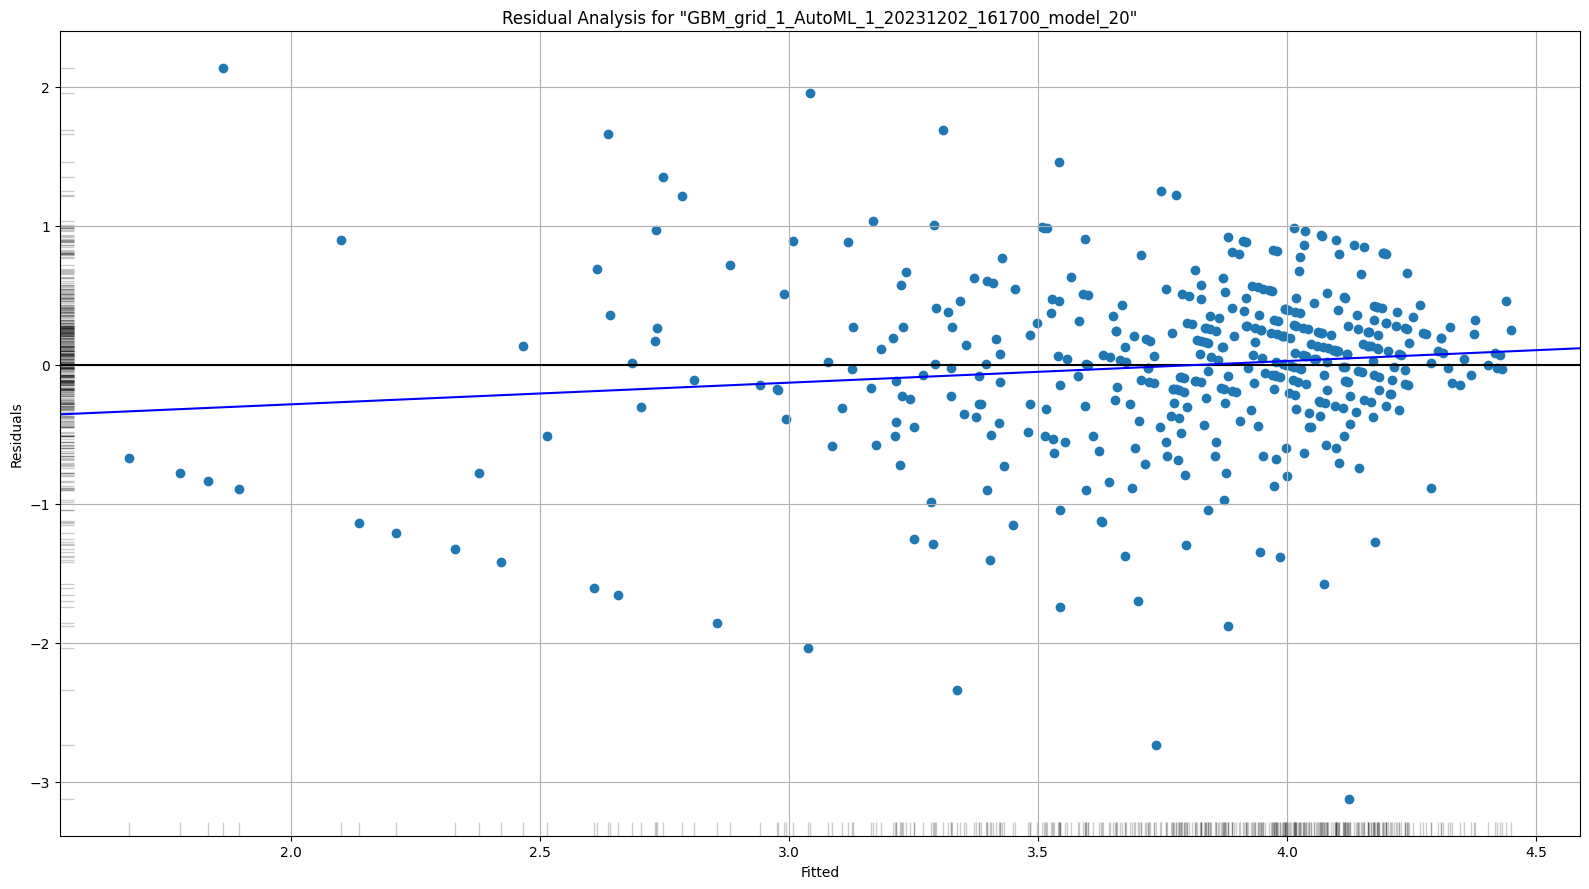

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

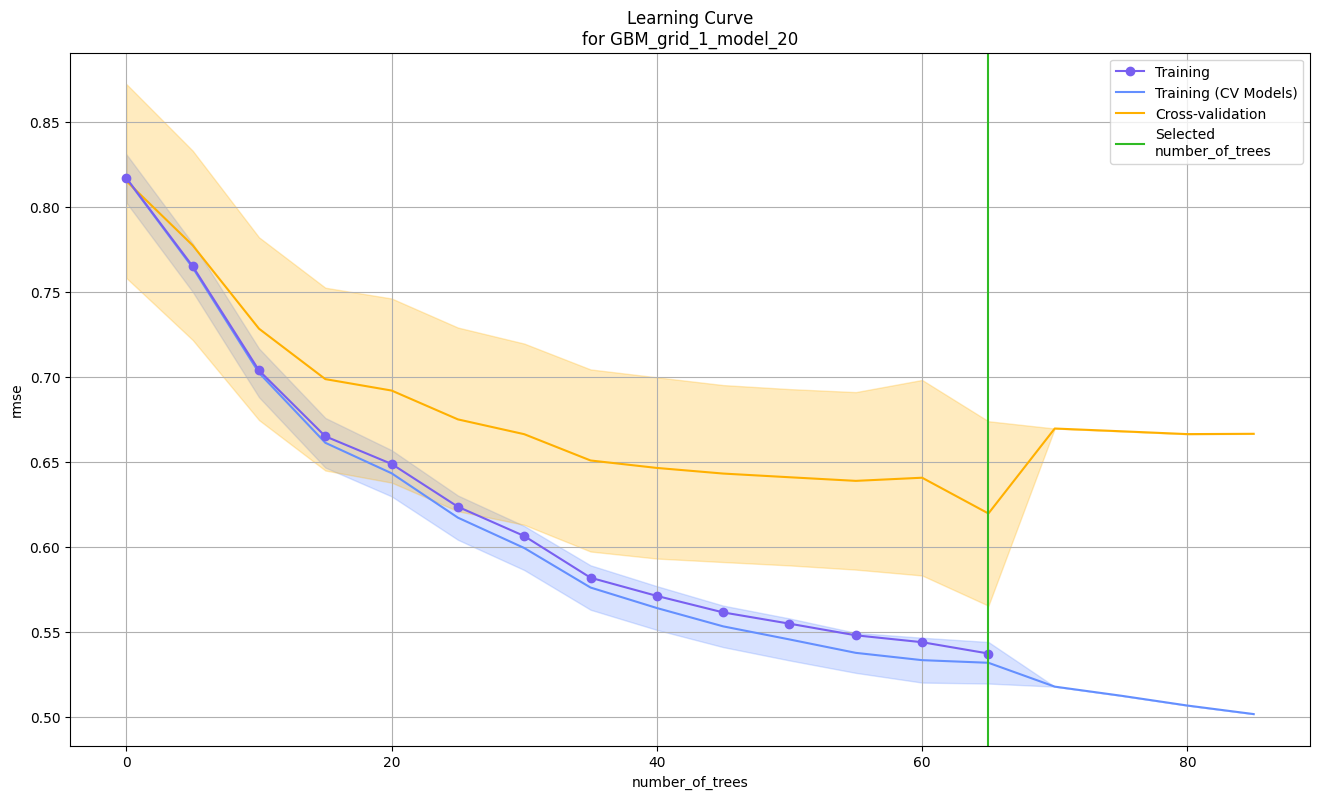

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

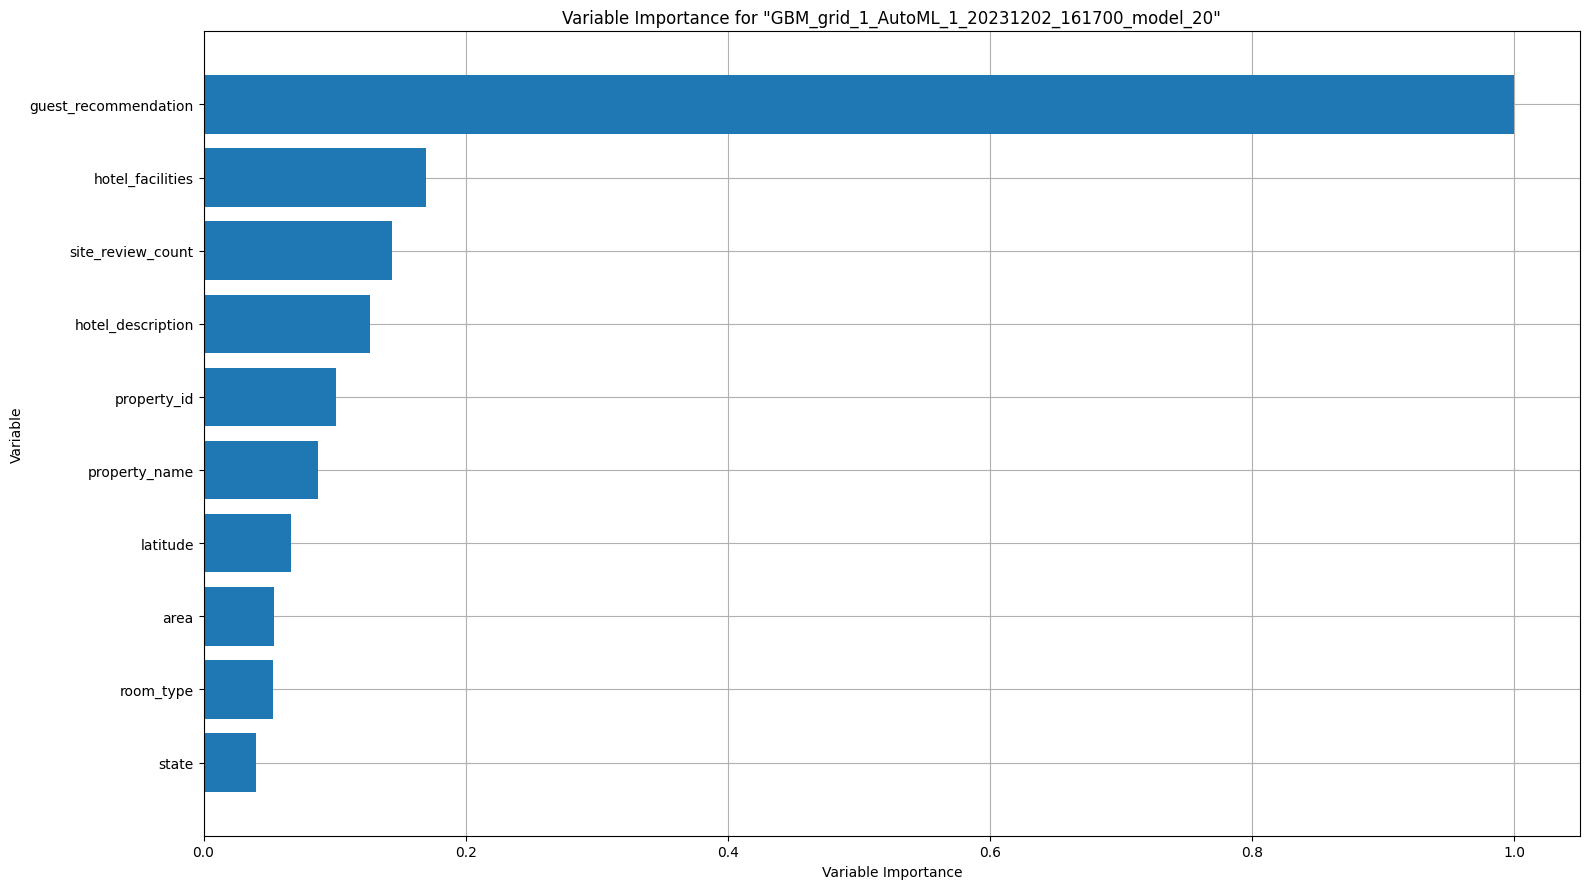

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

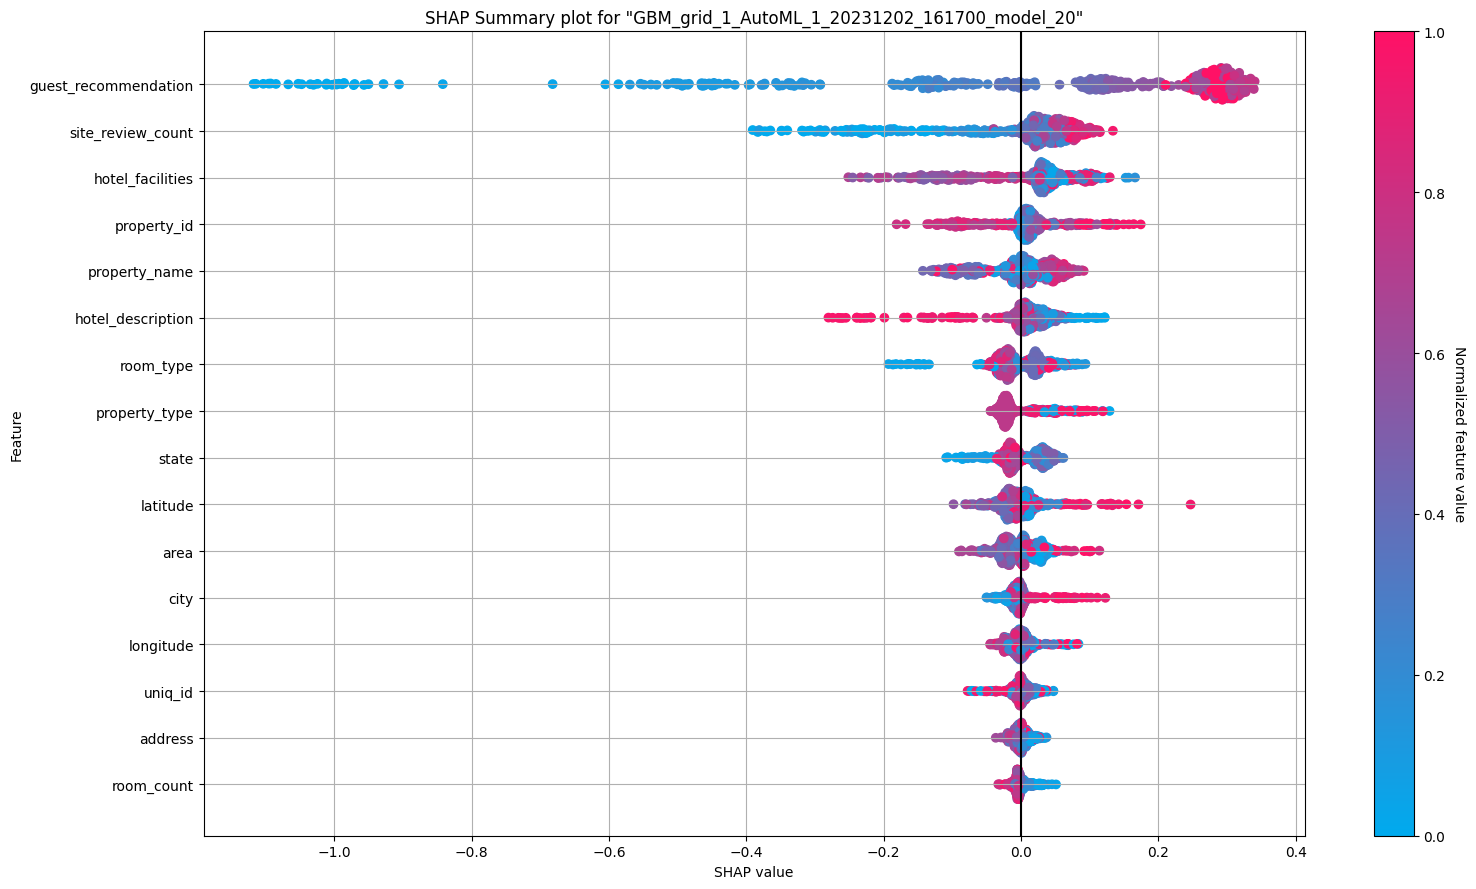

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

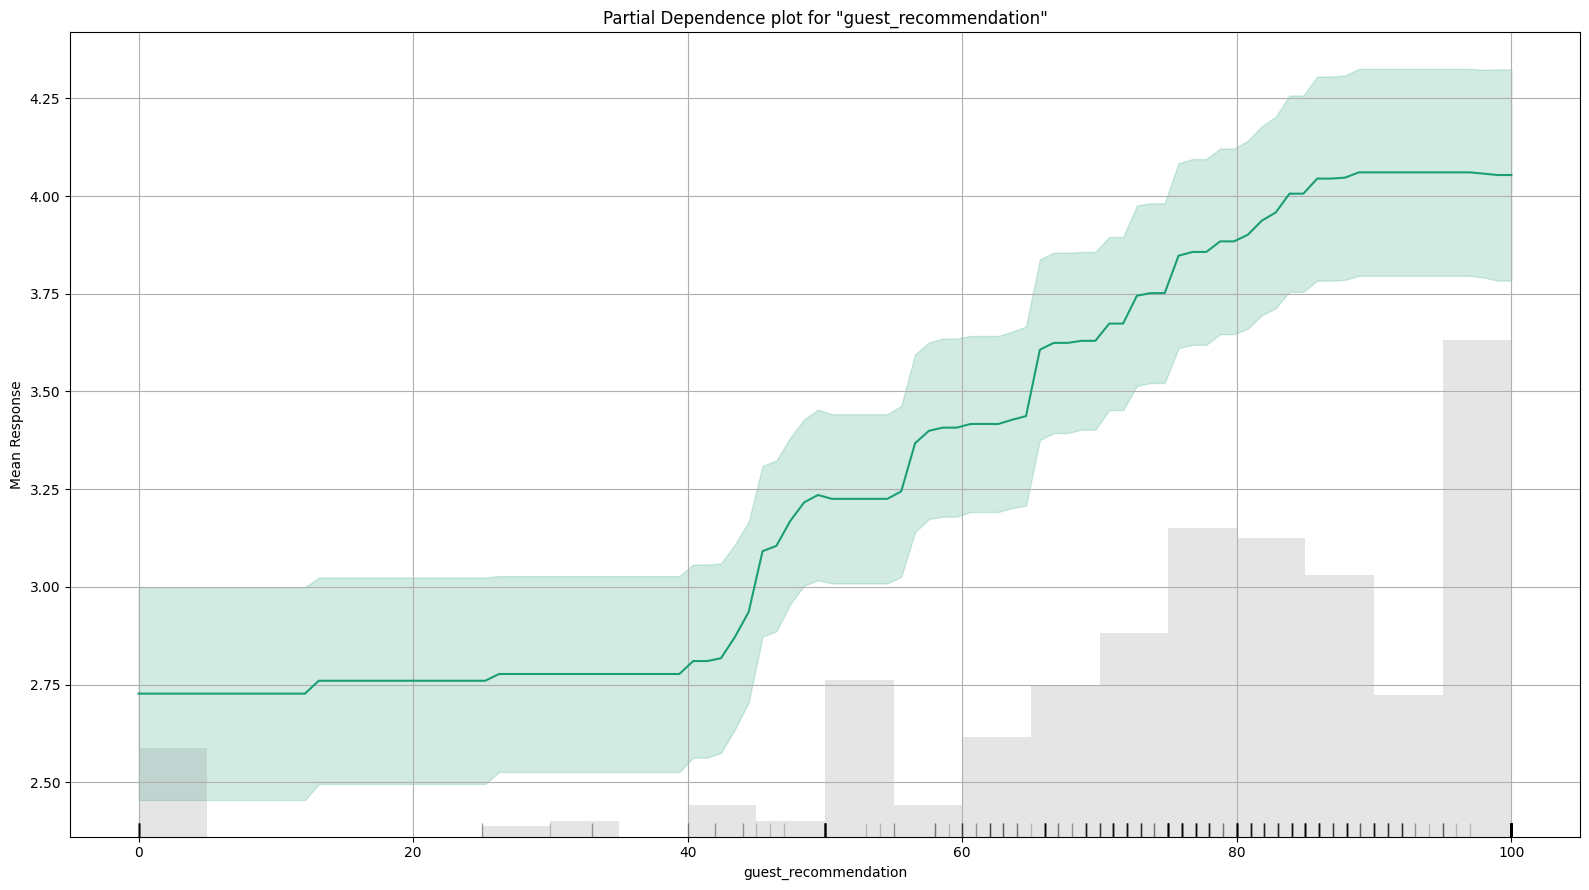

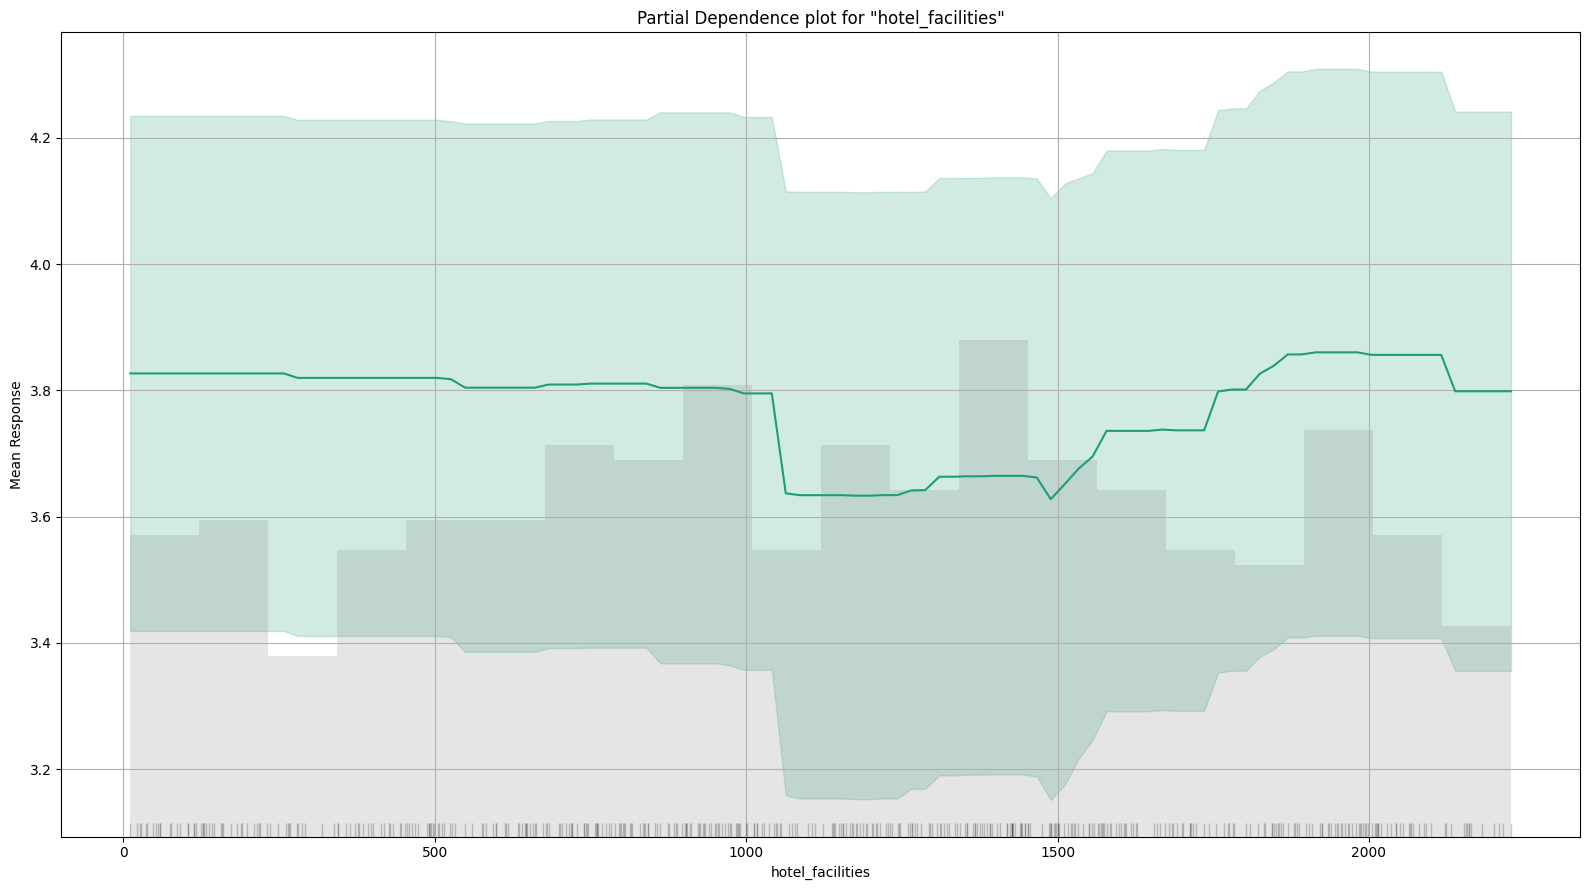

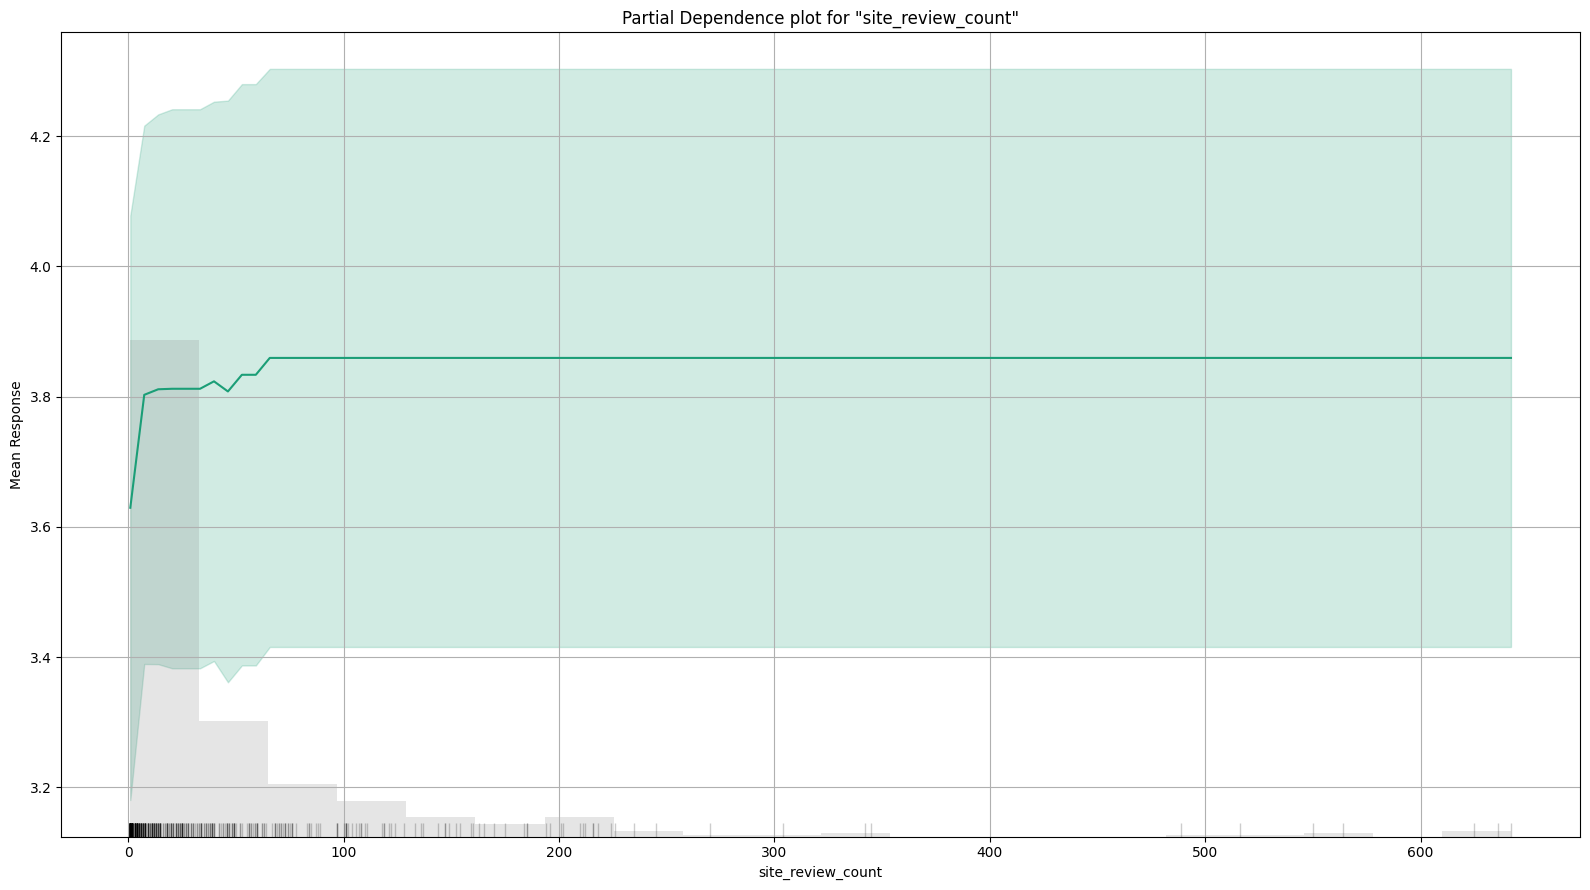

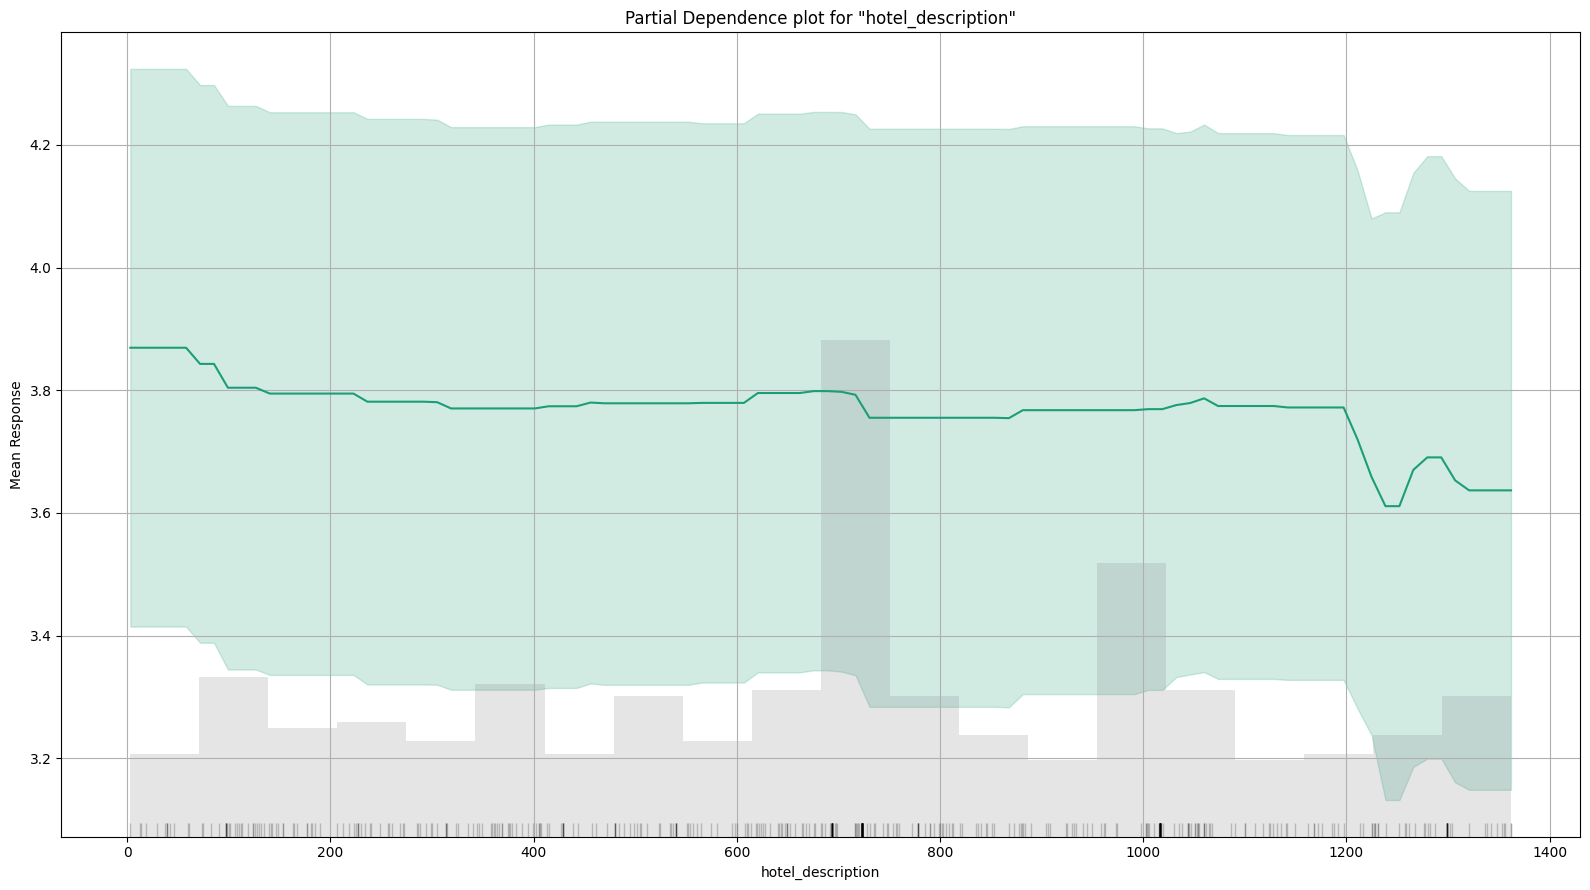

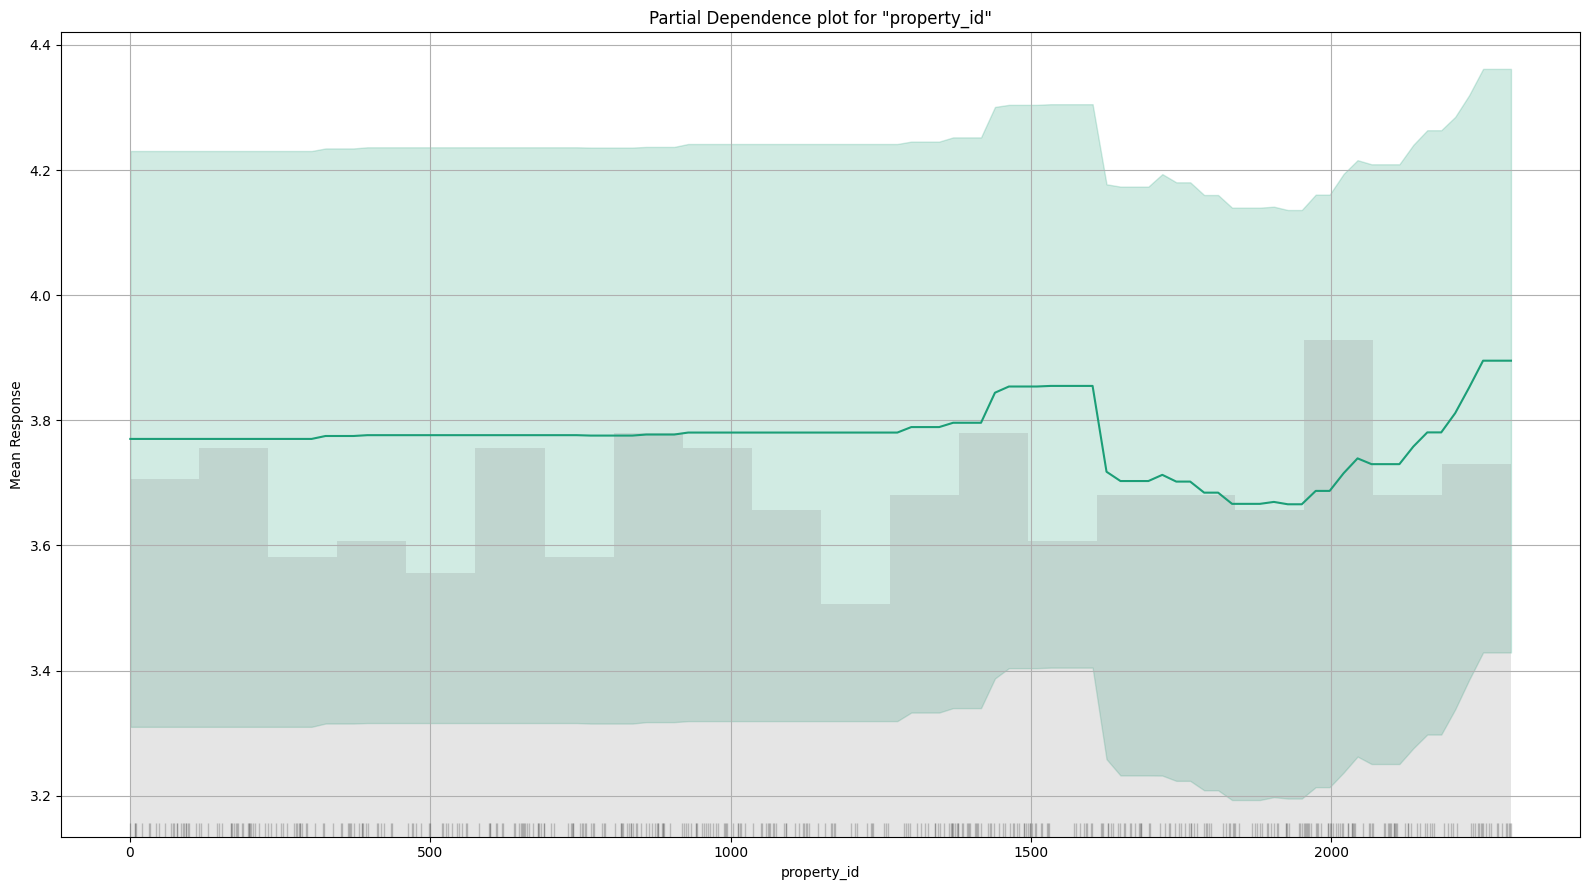

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

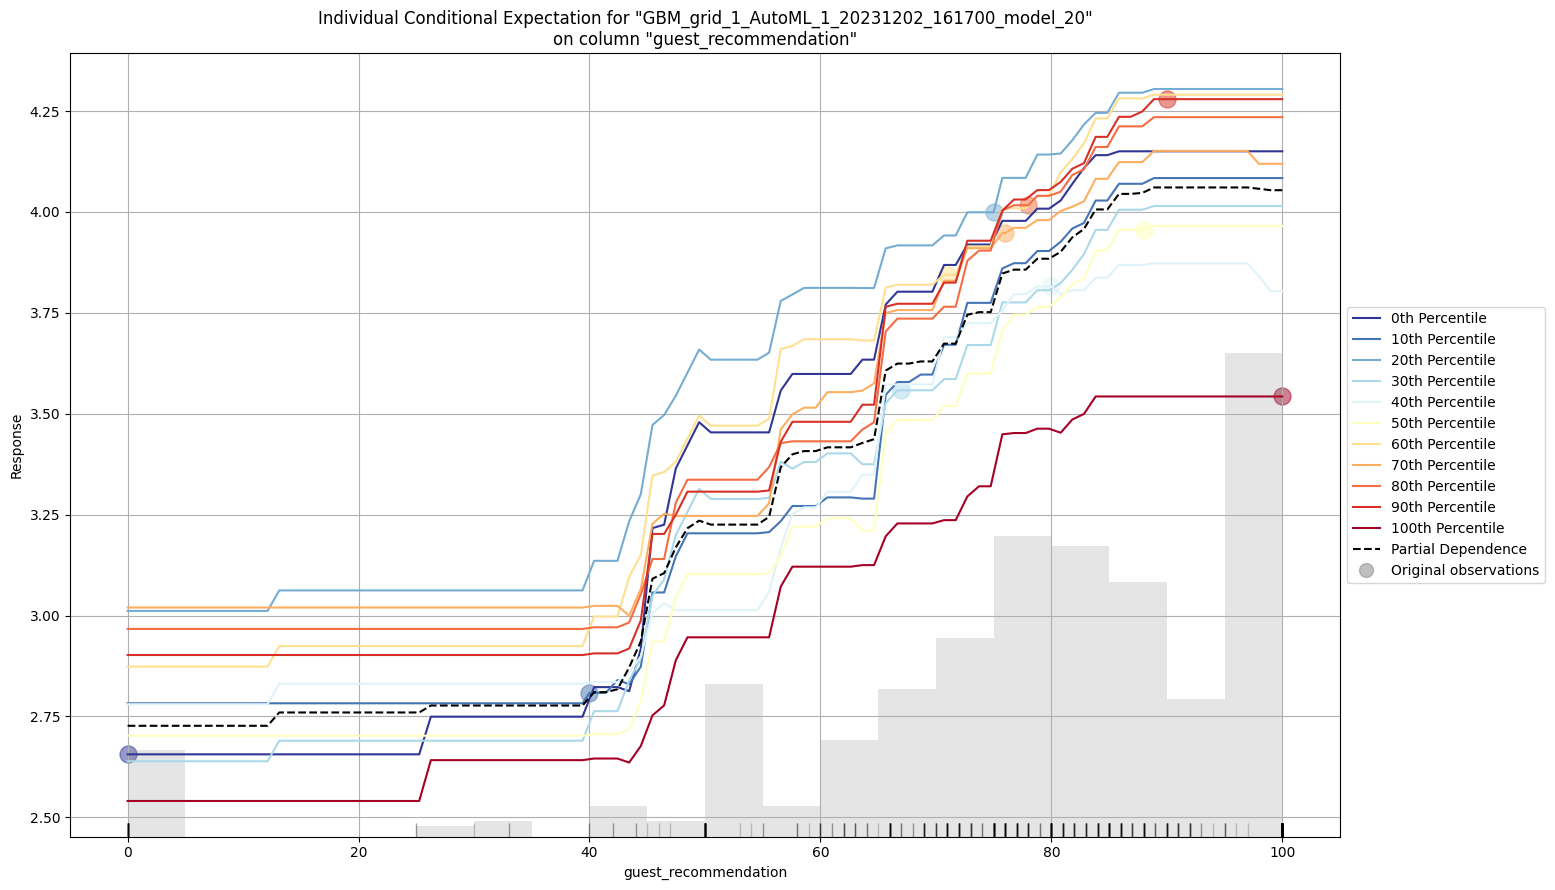

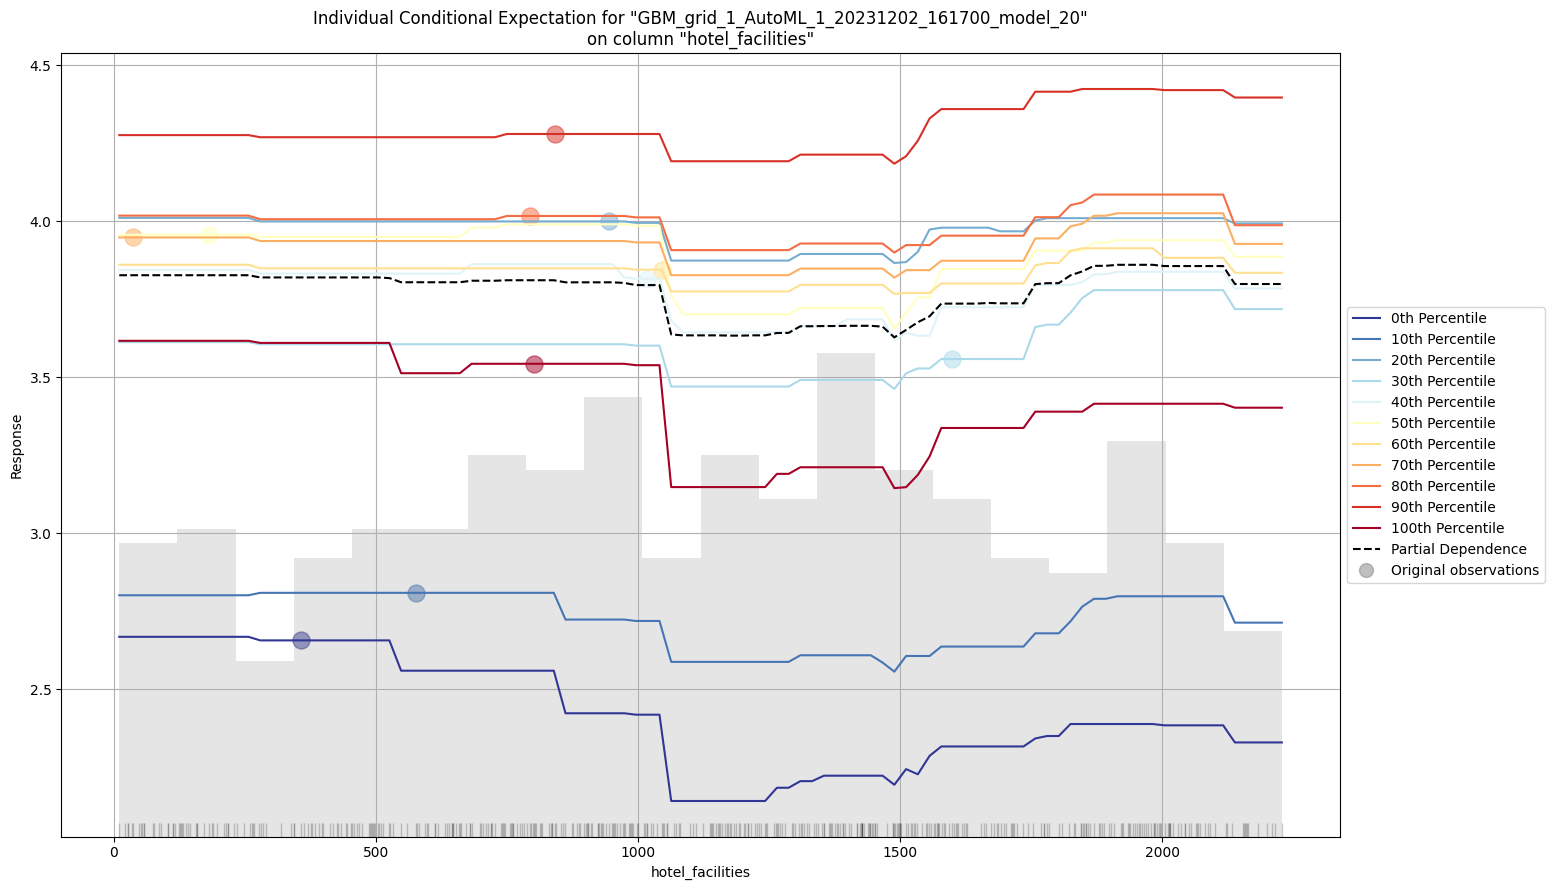

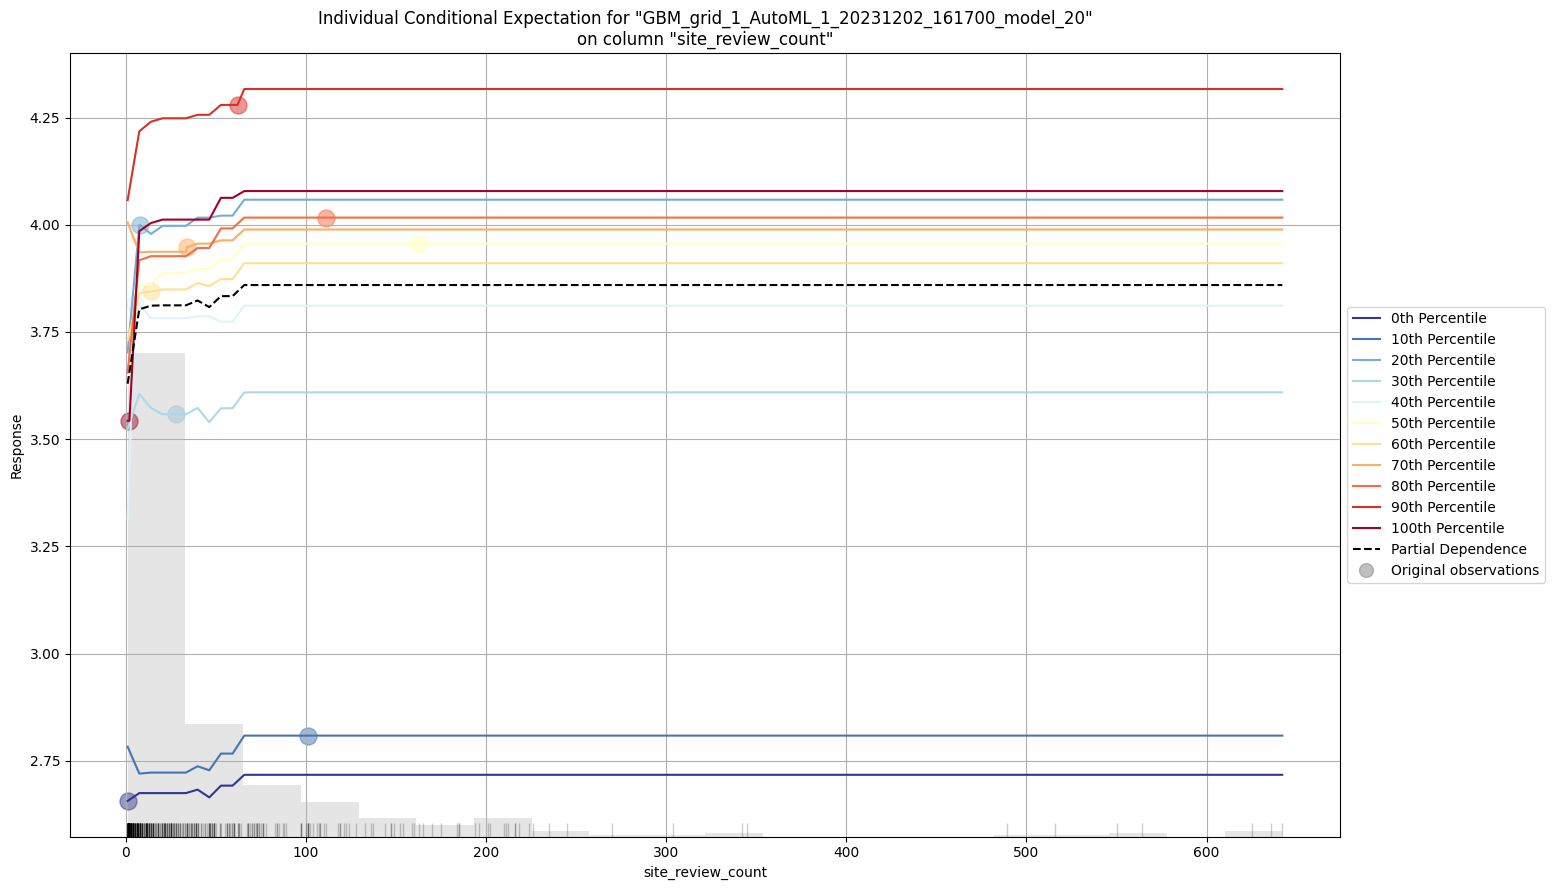

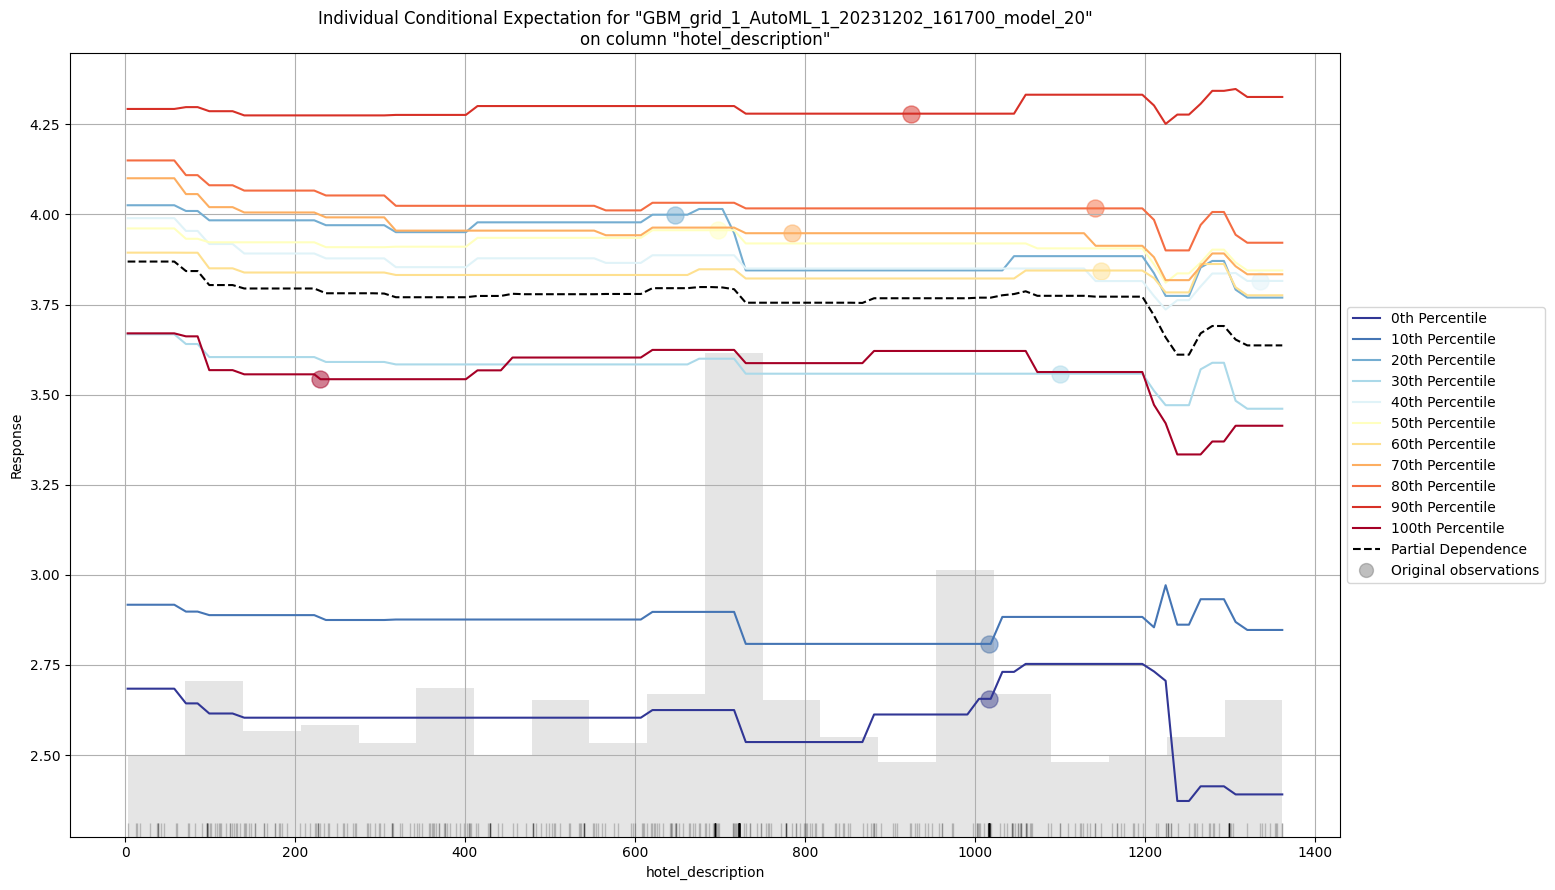

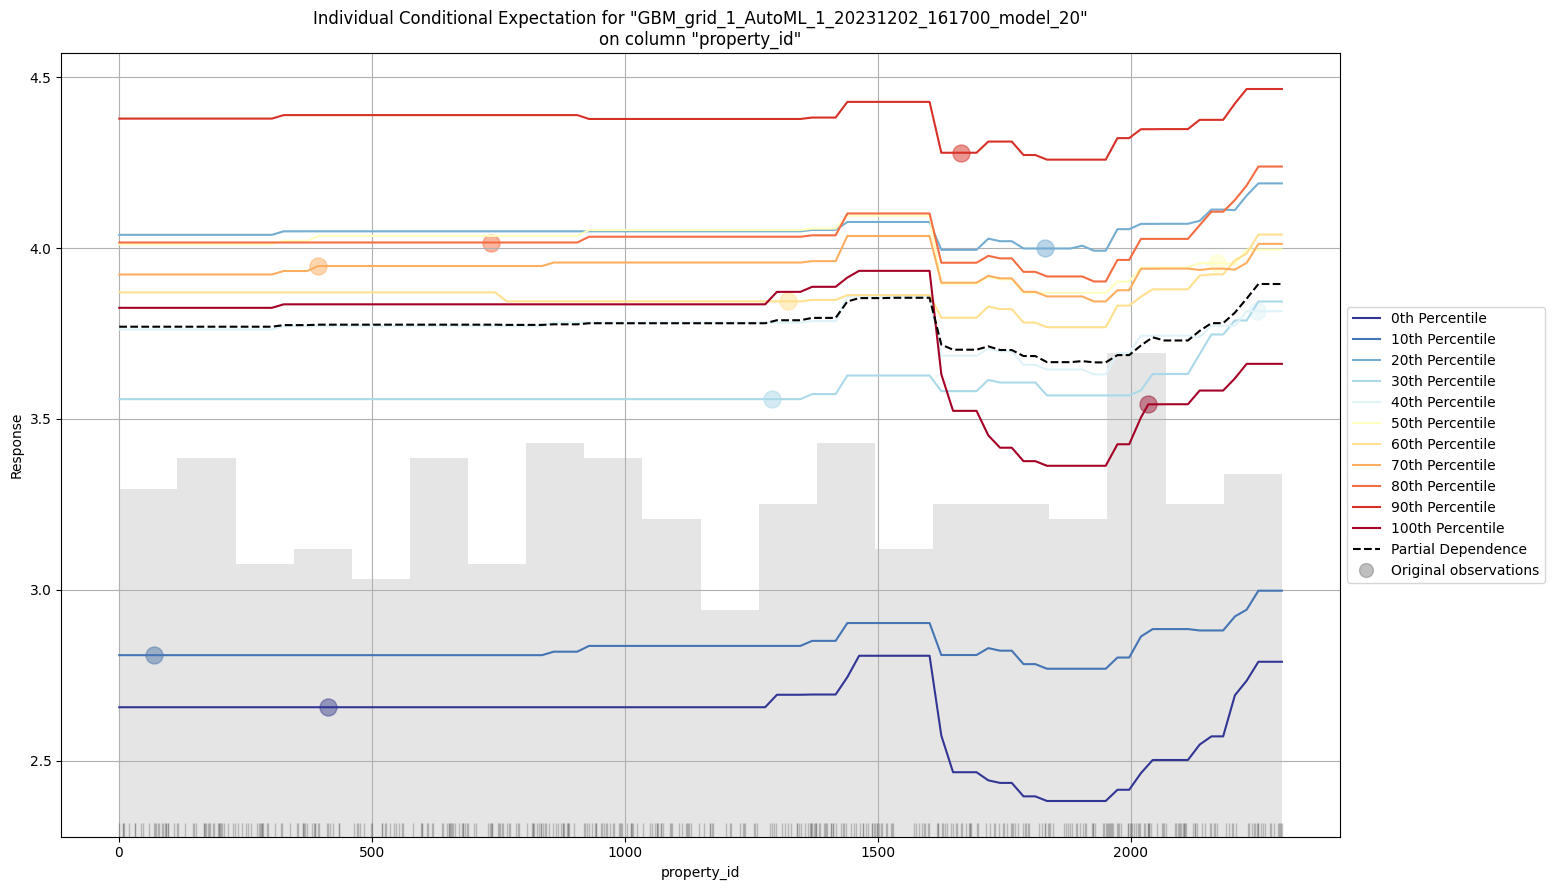

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [28]:
autoML_model.explain(autoML[1])  # AutoML Explainability


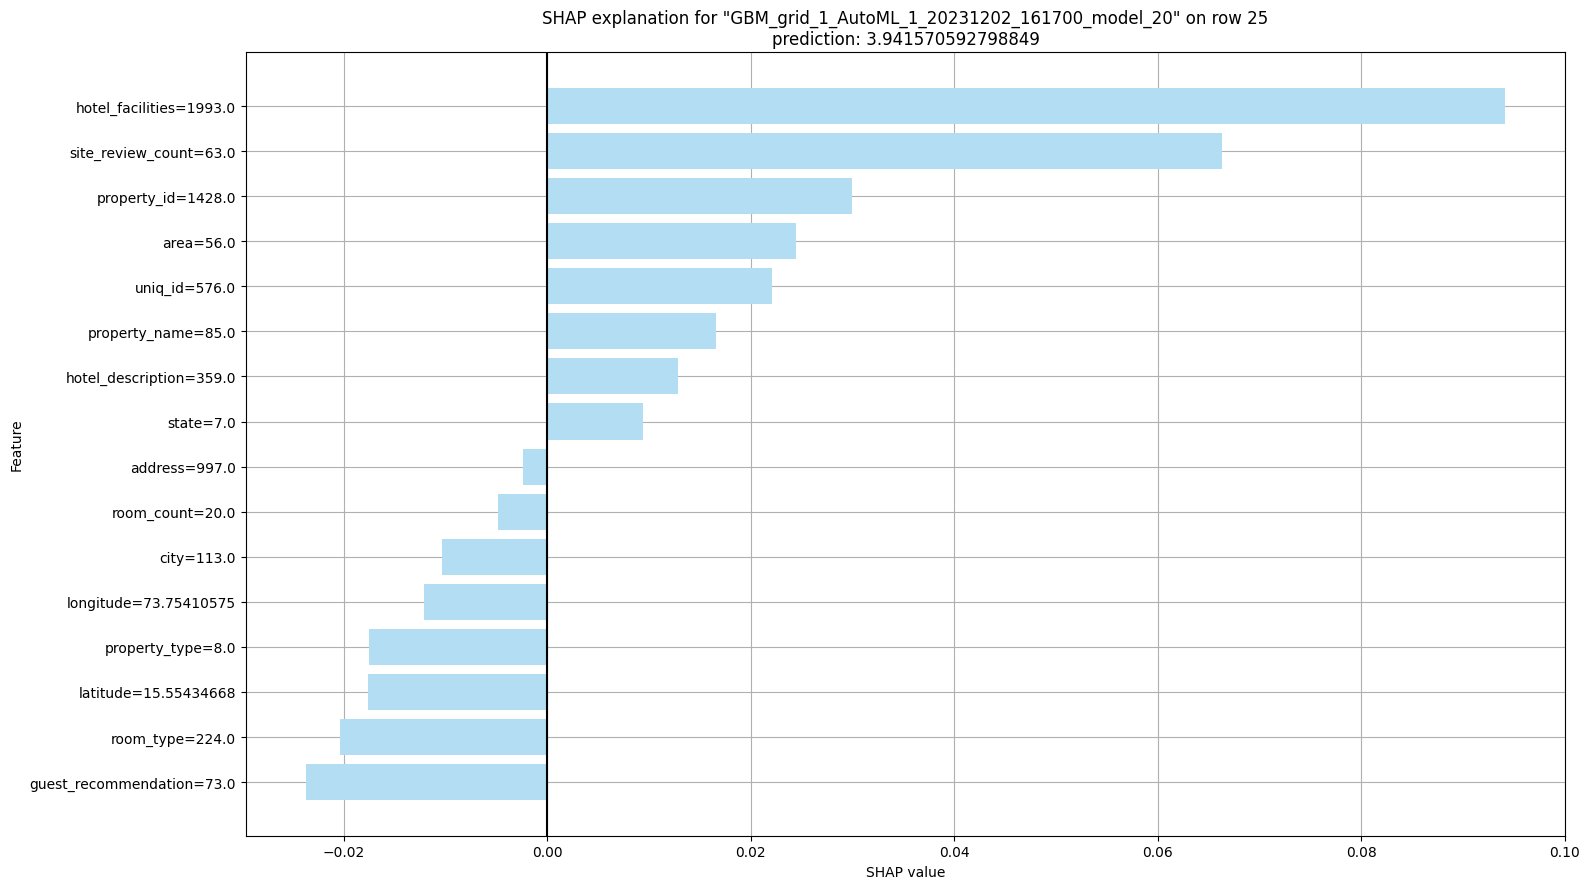

In [29]:
autoML_model.shap_explain_row_plot(
    autoML[1], 25
)  # Lets Analyze the 25th row in Test Data

# Interpreting Best Model from AutoML

Residual Analysis

The artifact of using an integer response value rather than a real value may be seen in this case by the striped lines of residuals. The graph below also shows that residuals have a normal distribution. Relatives indicate that there is no heteroscedasticity in the residuals.

Variable Importance
We recognize that the results from the linear model and tree-based model above are replicated in the variable importance plot. For understanding, the variable importance has been ranked from 0 to 1.

SHAP Summary
A few interpretations of the SHAP summary diagram are as follows:

Each feature is ranked according to how important it is to the prediction; for example, guest_recommendation is more important than site_review_count, and so on. Address is therefore the least important predictor in our model.

The feature's positive or negative influence on the prediction is shown by its position on the SHAP value axis. In other words, the influence increases with the distance a data point has from the 0.0 shape value. As we can see, the factor that affects the hotel's rating the most is the guest_recommendation. The dot's color indicates (Red - High, Blue - Low) how the value affects the outcome.

Compared to regular feature importance, SHAP analysis has the advantage of allowing us to see the feature's impact on the target across different values. The standard methods tend to overestimate the importance of continuous or high-cardinality categorical variables.

Partial Dependence Plot (PDP)
The marginal impact of a feature on the target (site_review_rating in our dataset) is displayed in a partial dependence plot. To obtain its PDP, one variable's value is changed while all other variables remain unchanged.

The computation of partial dependence plots is intuitive: The partial dependence function at a particular feature value represents the average prediction if we force all data points to assume that feature value.

ICE (Individual Conditional Expectation) Plot

The PDP plot and the ICE plot are comparable in several aspects; nevertheless, the primary distinction between the two approaches is that the PDP plot emphasizes the average effect of a feature rather than a specific instance. To overcome this shortcoming of the PDP plot, which considers the outputs from each instance rather than an average value, the ICE plot steps in.

# SHAP Analysis for Linear and Tree-Based Models

Here the x-axis is the feature and the y-axis is the output as we vary the feature. The grey histogram is the distribution of variables in the dataset and the cross made by E[Feature], E[f(x)] is the expected values.

Let us take a feature of guest recommendation

For the linear model the cross is made at approx E[f(x)] 3.7
For Tree-based model the cross is made at approx E[f(x)] 3.74
So as the guest recommendation increases the expected value also increases

Talking about the red line on the plot - When we give a sample as an input (sample_ind = 18) as an input to check the output. By plotting this we can see the difference between the model output from the expected value.


Permutation explainer: 2072it [02:33, 13.47it/s]                                                                       


TypeError: Axes.stem() got an unexpected keyword argument 'use_line_collection'

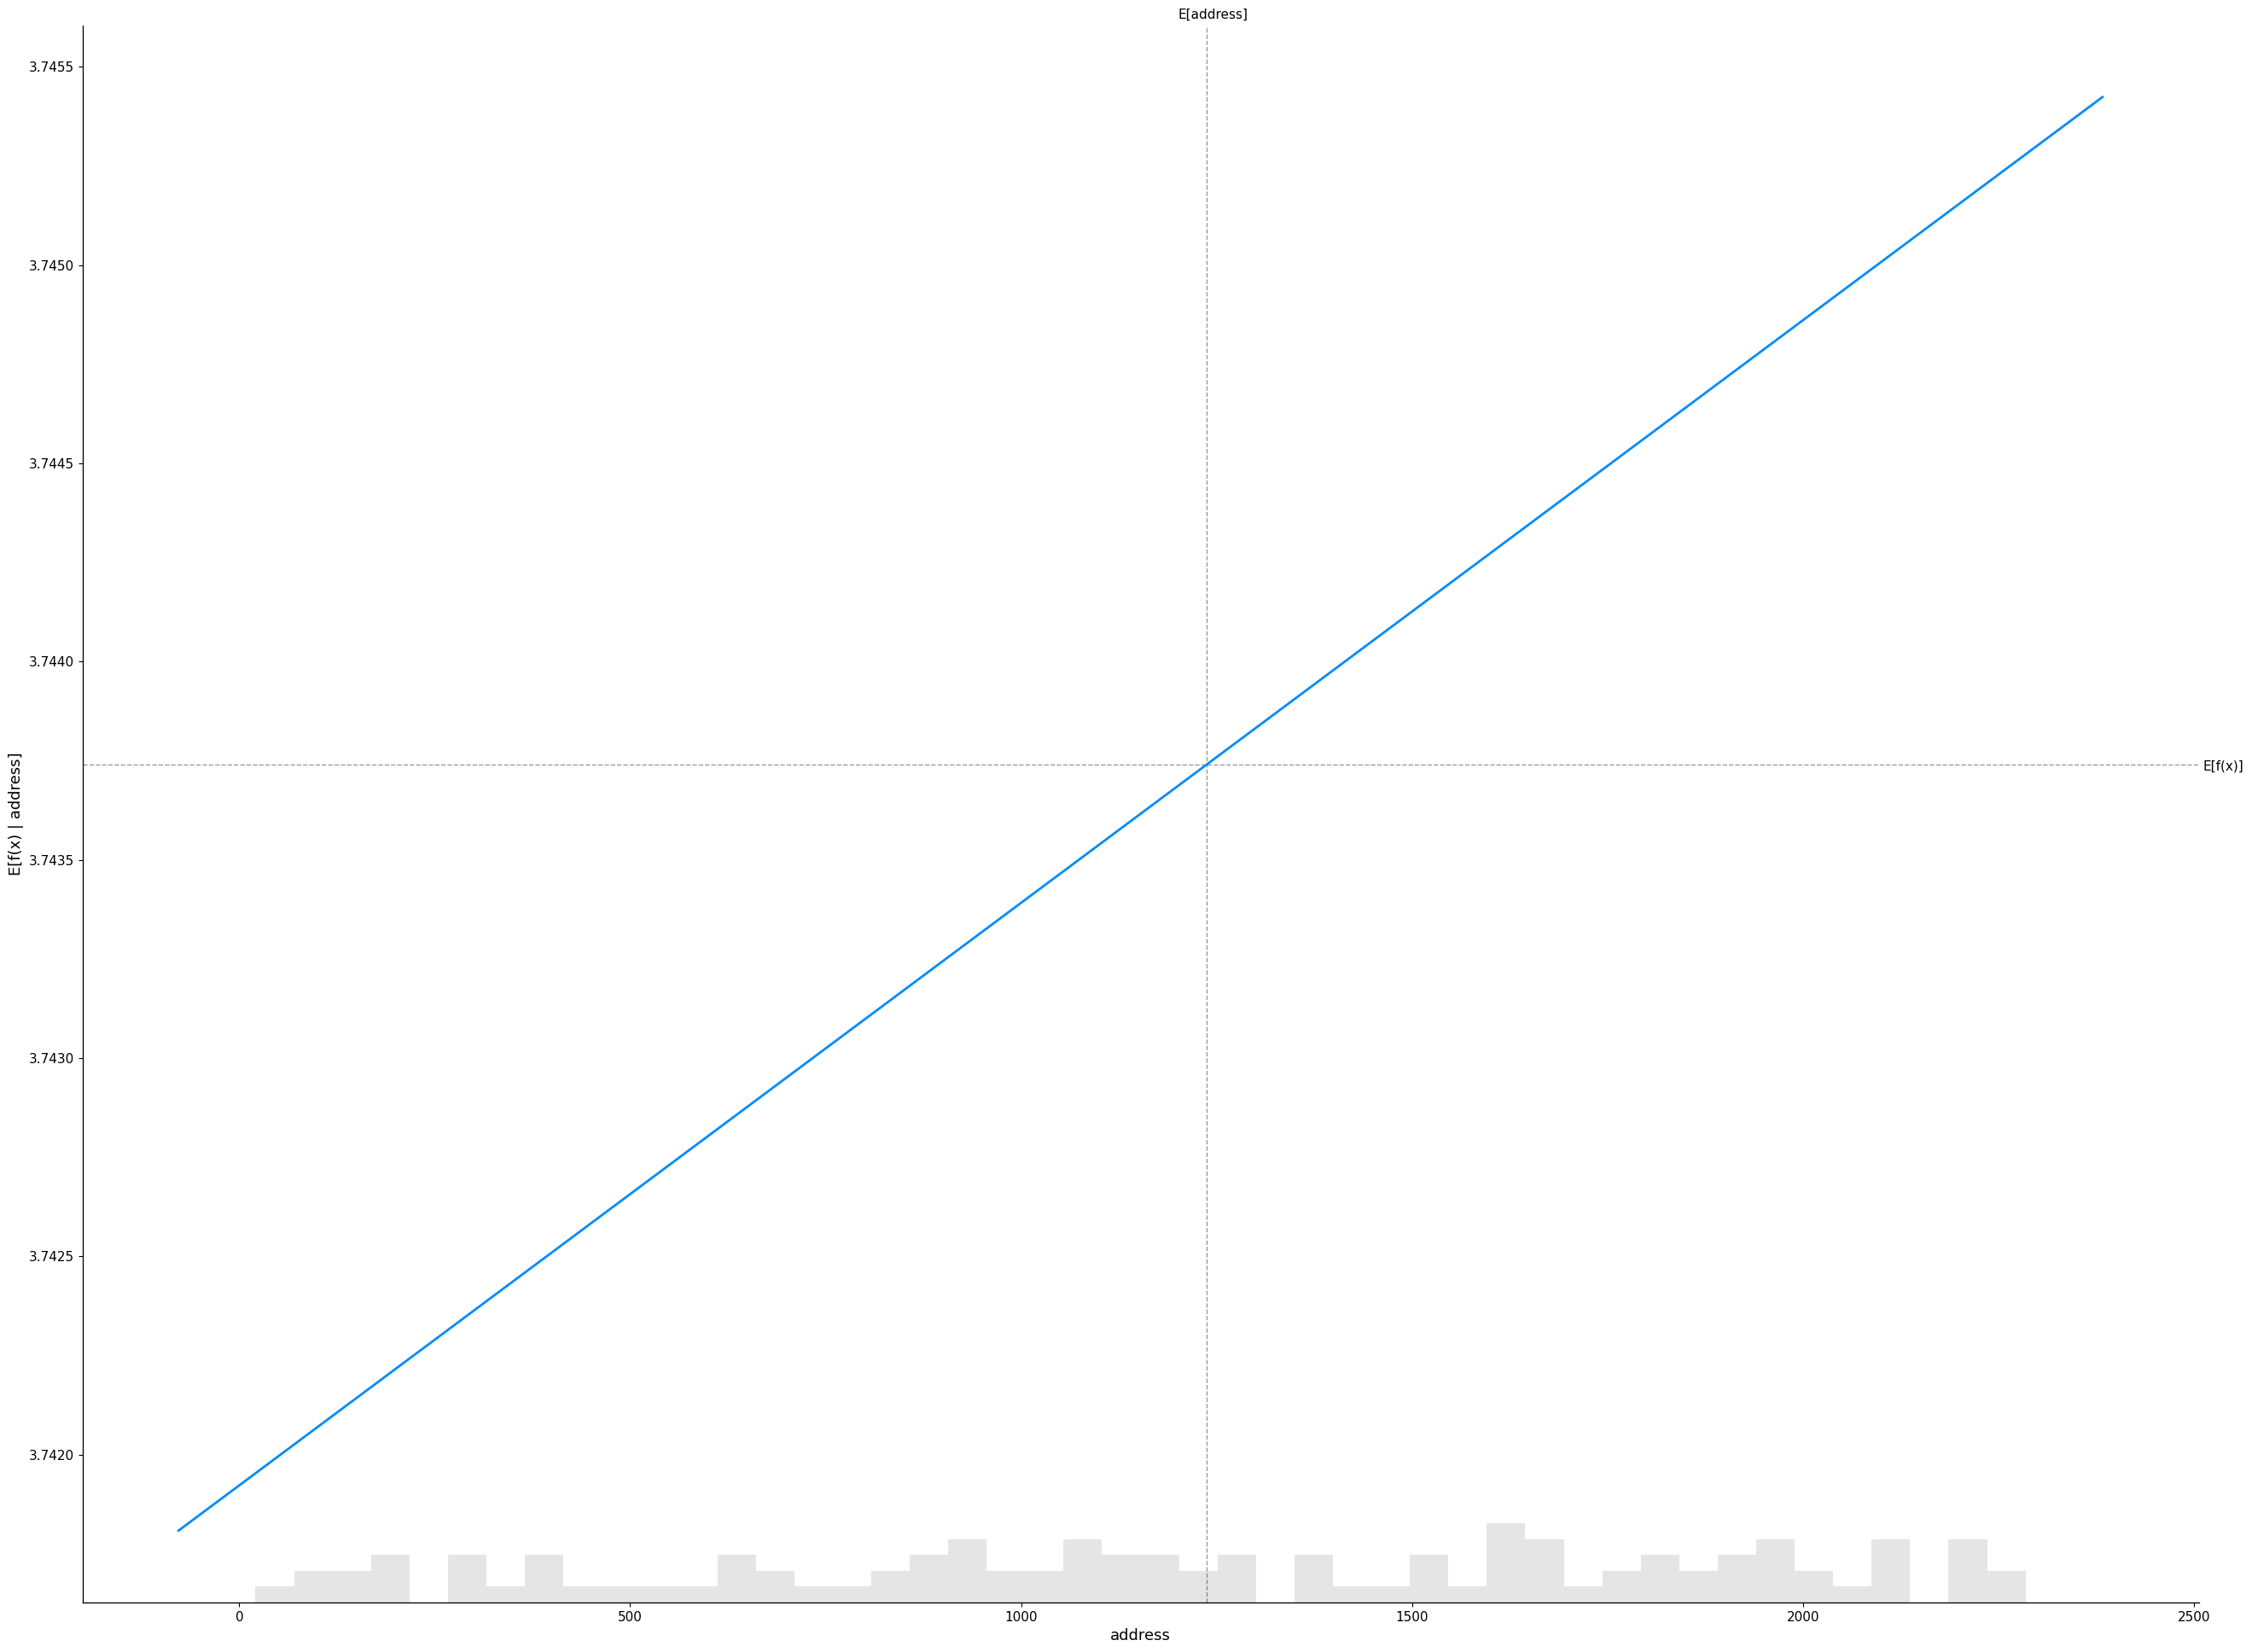

In [30]:
# SHAP explanation of a Linear Model
linear_explainer = shap.Explainer(linear_model.predict, x_train_100)
linear_shap_values = linear_explainer(x_train)
for i in x_train.columns:
    # make a standard partial dependence plot
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        linear_model.predict,
        x_train_100,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=linear_shap_values[sample_ind : sample_ind + 1, :],
    )

Permutation explainer: 2072it [04:10,  7.95it/s]                                                                       


TypeError: Axes.stem() got an unexpected keyword argument 'use_line_collection'

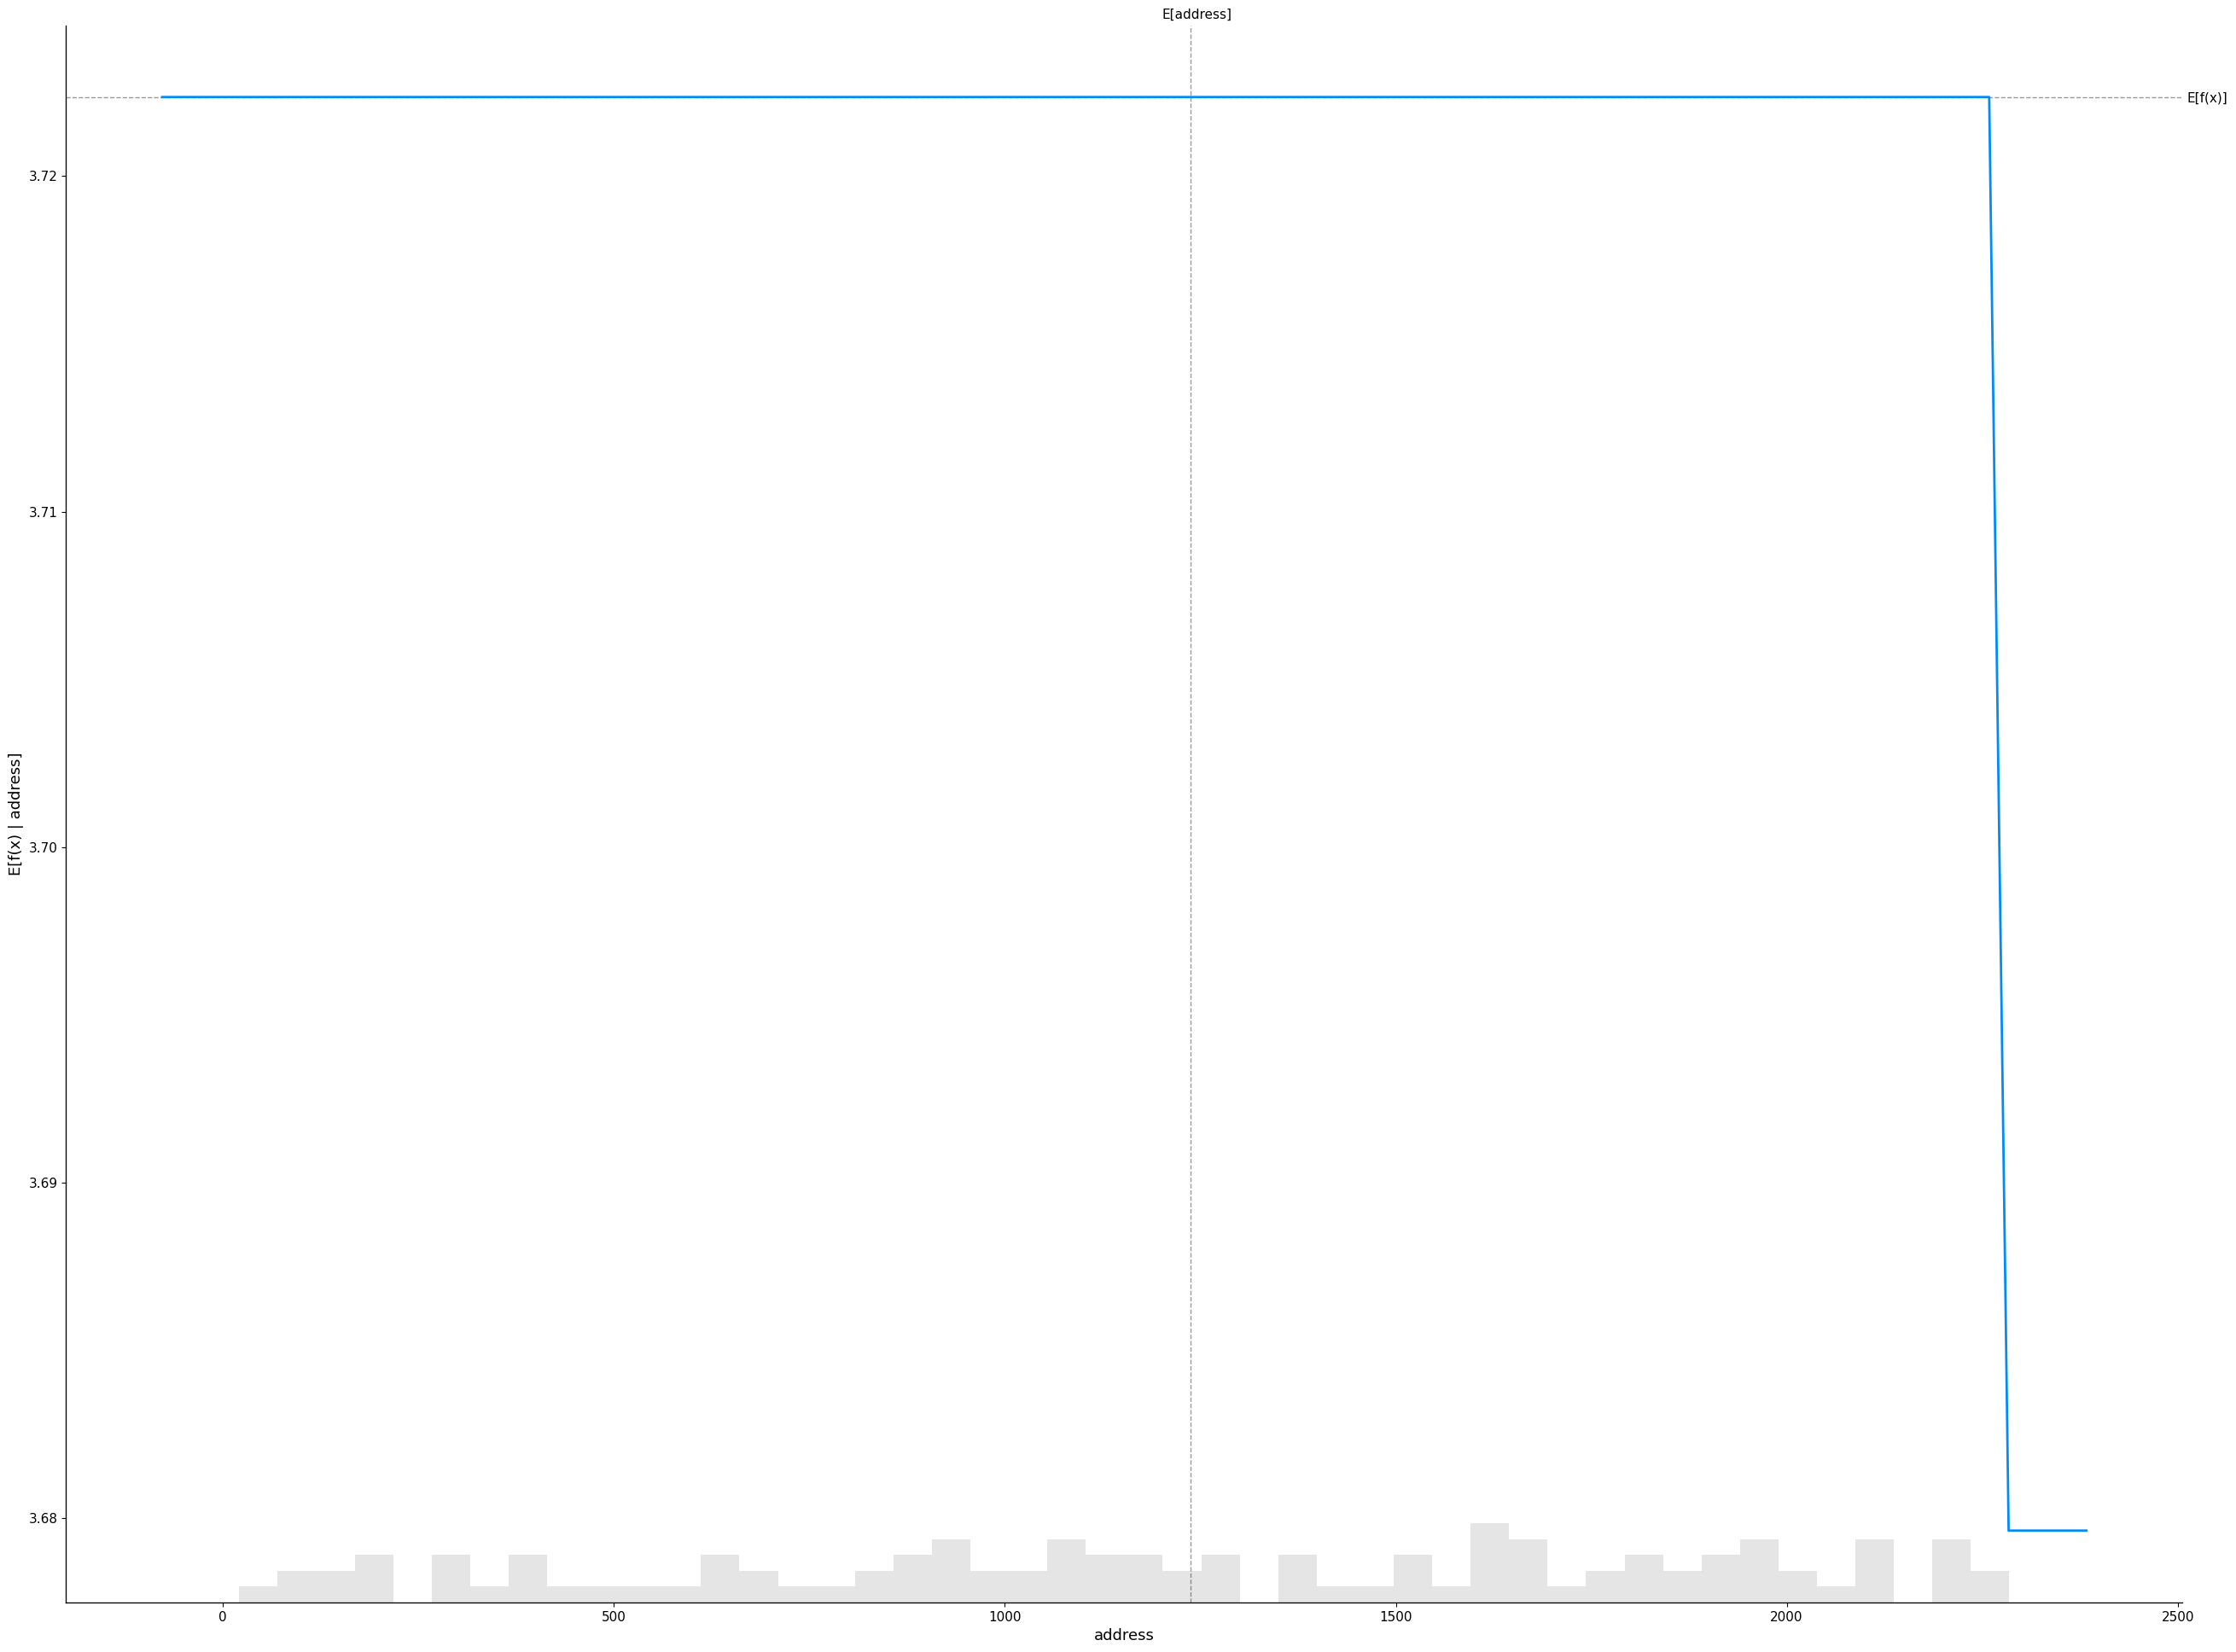

In [31]:
# SHAP explanation of a tree based model
tree_explainer = shap.Explainer(tree_model.predict, x_train_100)
tree_shap_values = tree_explainer(x_train)
for i in x_train.columns:
    # make a standard partial dependence plot
    sample_ind = 18
    shap.partial_dependence_plot(
        i,
        tree_model.predict,
        x_train_100,
        model_expected_value=True,
        feature_expected_value=True,
        ice=False,
        shap_values=tree_shap_values[sample_ind : sample_ind + 1, :],
    )

# Interpreting SHAP Feature Importance Plot for Linear and Tree-based model

Simple logic underlies the concept of SHAP feature importance: features with high absolute Shapley values are significant. We average the absolute Shapley values for every feature throughout the data since we are looking for global importance. We then plot the features after sorting them according to decreasing significance.

The following plots are

SHAP feature importance for a linear model
SHAP feature importance for tree-based model
As we can see below in the plots, there is a difference in feature importance for both the models

Property_id is the second most significant feature in the linear model, however site_review_count is the second most significant feature in our tree-based model when feature importance is determined by averaging SHAP values.

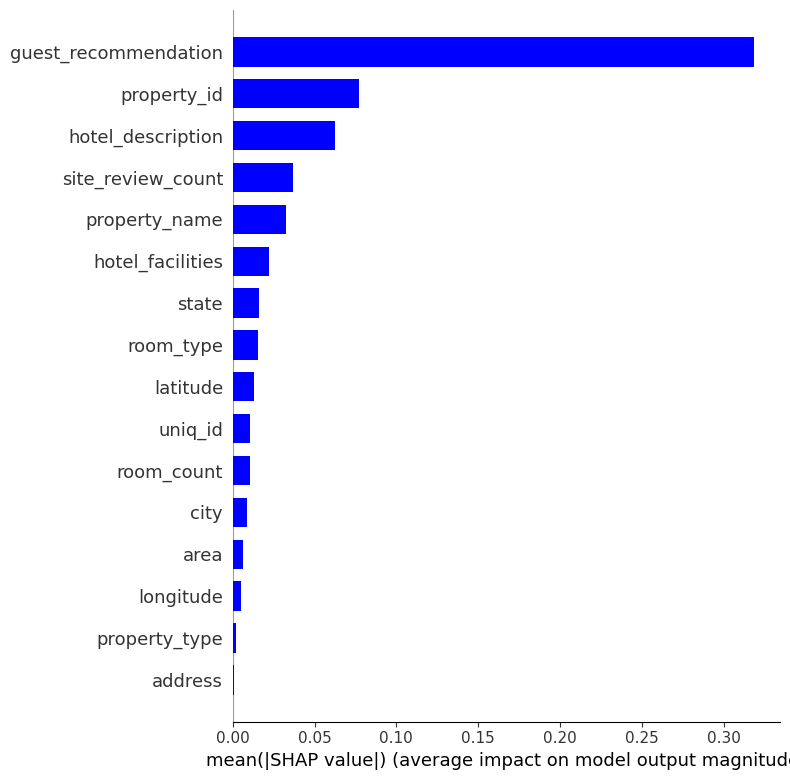

In [32]:
# SHAP variable importance for a Linear Model
shap.summary_plot(linear_shap_values, x_train, plot_type="bar", color="blue")

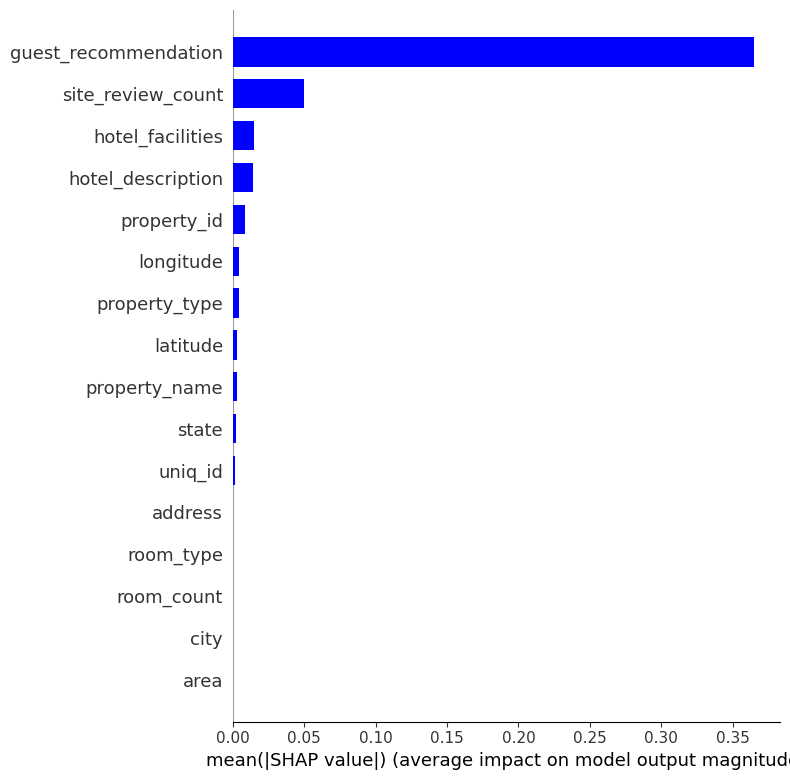

In [33]:
# SHAP variable importance for Tree based model
shap.summary_plot(tree_shap_values, x_train, plot_type="bar", color="blue")

# Interpreting Waterfall SHAP visualization

Let's consider the same sample (sample_ind = 18)

In the linear model it says that f(x) = 3.649 is what we got as a model output and the expected output for this sample was 3.724.We came pretty close to determining it as the difference is only 0.075.
The waterfall model explains how we got the expected output, and which features contributed to what. .

The result we obtained from the tree-based model for the the same sample was 3.646, whereas the expected output was 3.732. All that's different between the tree-based model and the linear model is to what extent to which individual features have an impact.

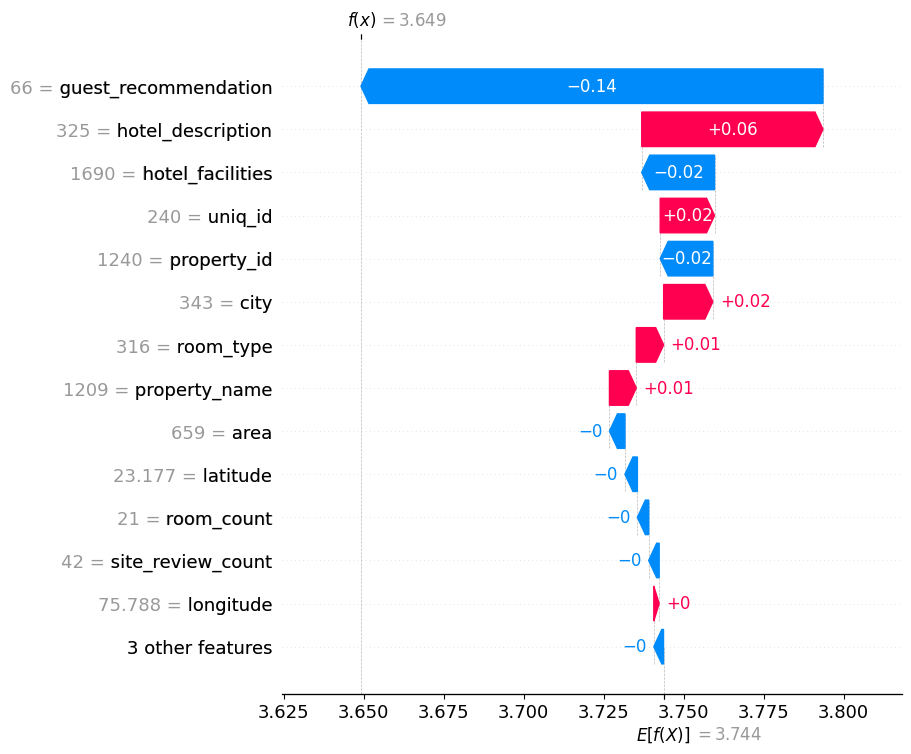

In [34]:
# Waterfall plot for linear model
shap.plots.waterfall(linear_shap_values[sample_ind], max_display=14)

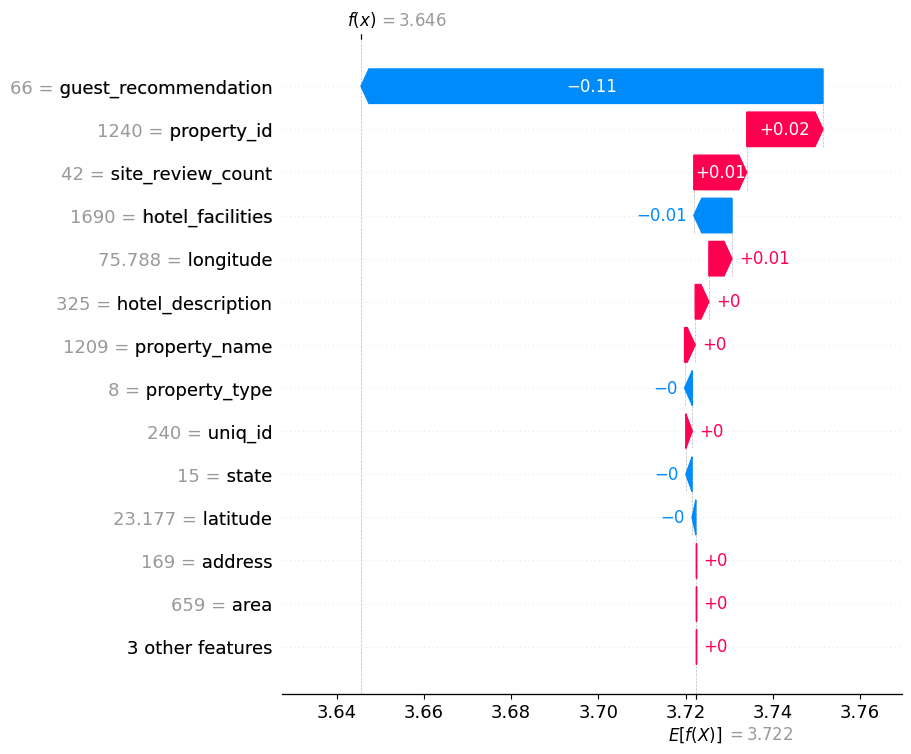

In [35]:
# Waterfall plot for Tree Based Model
shap.plots.waterfall(tree_shap_values[sample_ind], max_display=14)

# Interpret the summary plot for the Linear and Tree-based model

Here the features are listed in descending order of their importance. This is one of the easiest ways to analyze an ML model and how the features are affecting the target and to what extent.

1. Each dot(both red and blue) represents a feature of the model
2. Red color represents high values whereas blue color represents low value
3. If a dot is on the right side of the y-axis then it had a positive impact and if it is on the left side of the axis it had a negative impact
4. The position of a dot on the x-axis represents the intensity of impact it had, the more it is away from the axis greater the impact

This visualization is very useful when it comes to interpreting how our model is working.


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


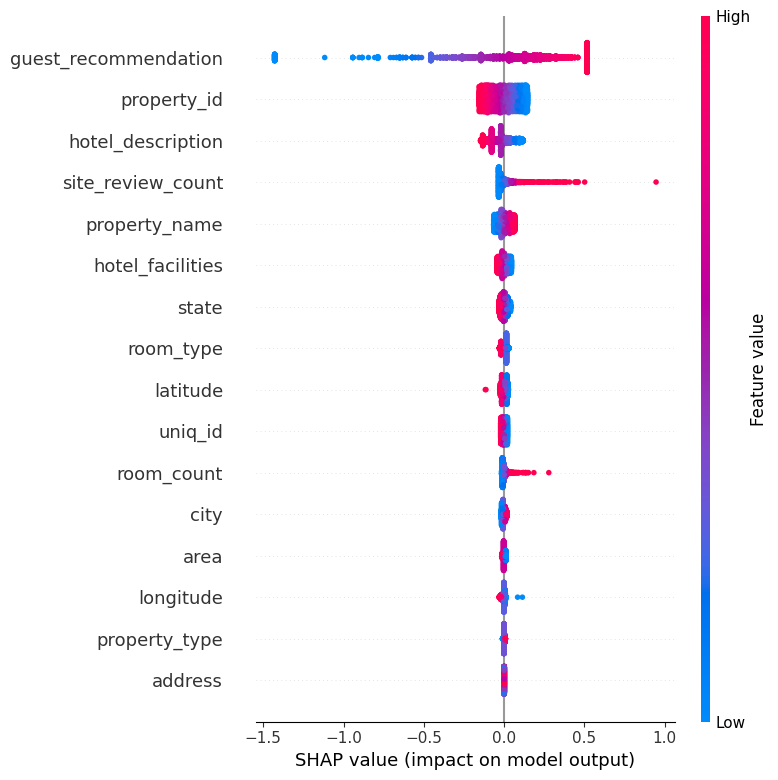

In [36]:
# SHAP summary for Linear Model
shap.summary_plot(linear_shap_values, x_train)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


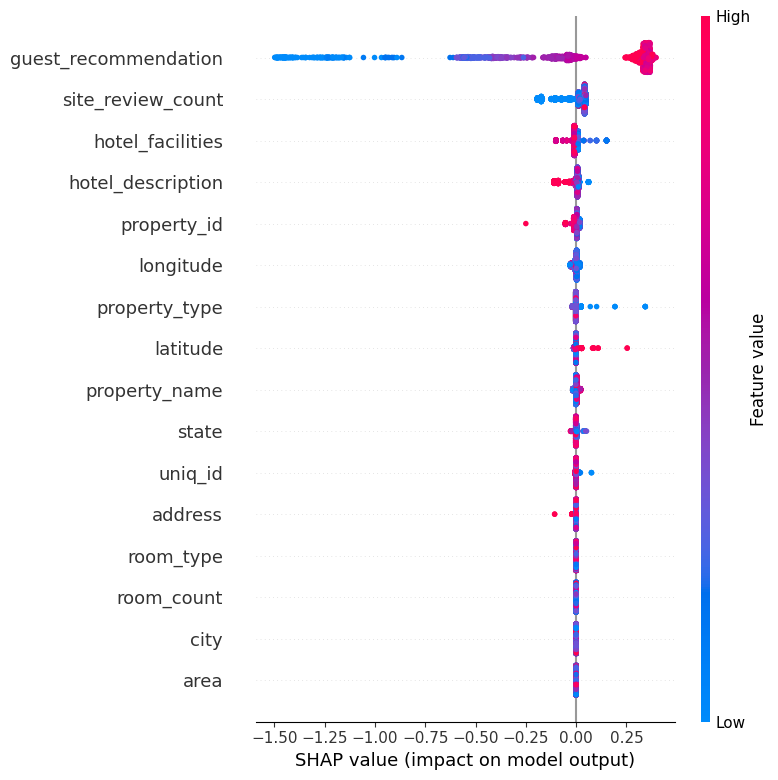

In [37]:
# SHAP summary for Tree Based Model
shap.summary_plot(tree_shap_values, x_train)

# Interpreting SHAP dependence plot for Linear and Tree-based model

The SHAP dependence plot shows the marginal effect one or two features have on the predicted outcome of a machine learning model. It tells whether the relationship between the target and a feature is linear, monotonic, or more complex. Let us interpret the linear and Tree-based models using the SHAP dependence plot. Here in these graphs, we get a dot for every hotel in our dataset.

1. As we can observe the linear model feature and its SHAP value have a linear relationship. If a feature has a positive impact on the hotel rating then the relationship will be directly proportional and if the feature harms the hotel rating the relationship will be inversely proportional.

2. For the tree-based model as observed the relationship between feature and its SHAP value is no longer linear. Now we see that the SHAP dependence plot no longer exactly matches the partial dependence plot because they are accounting for the interaction effects. Because if we look at the PDP, we are losing all the high order interaction (and's and or's) in the model that our model may be doing. But unlike PDP, the SHAP defense plot takes these interactions into account.

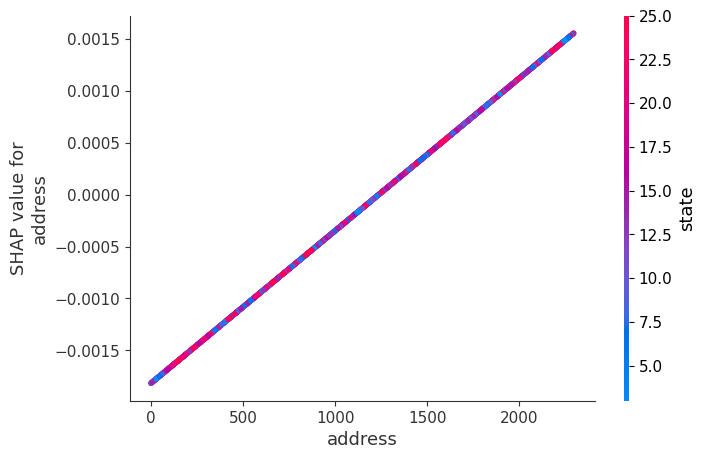

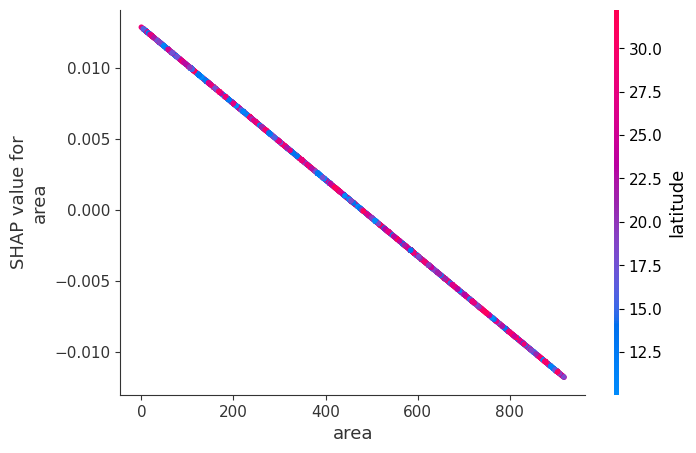

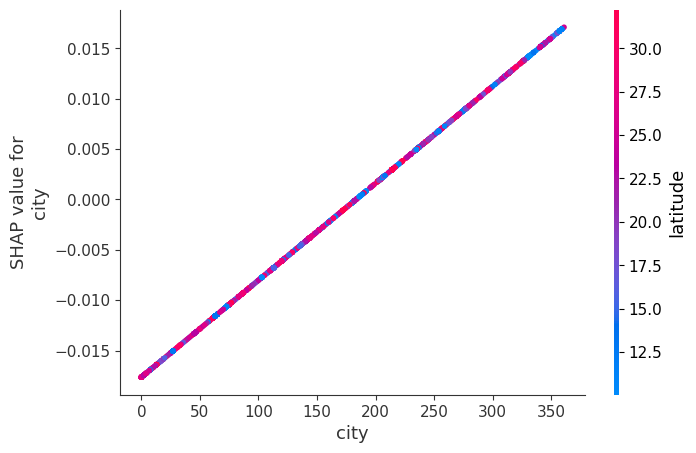

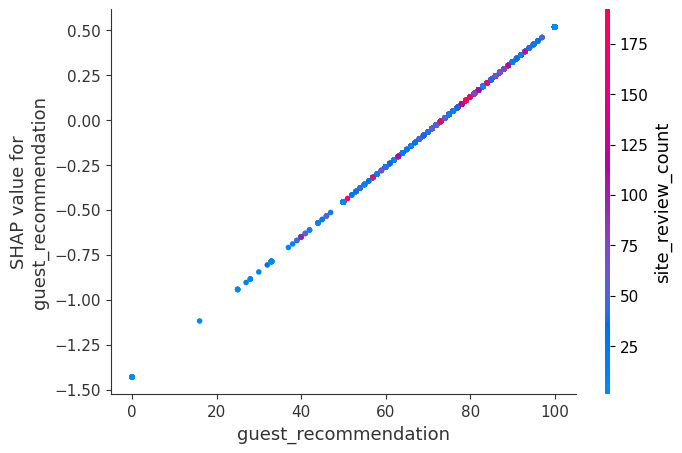

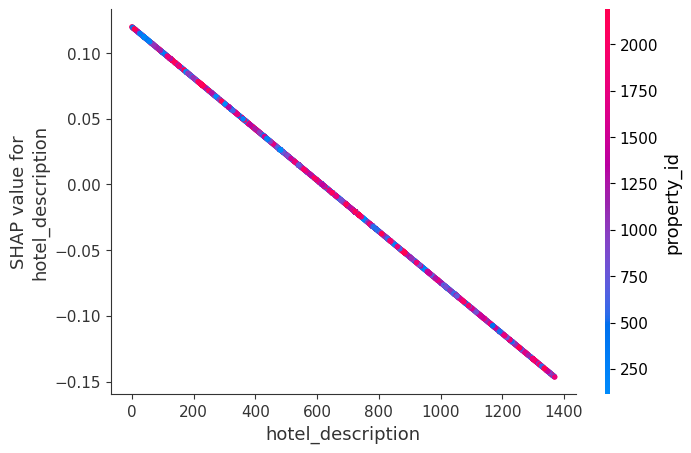

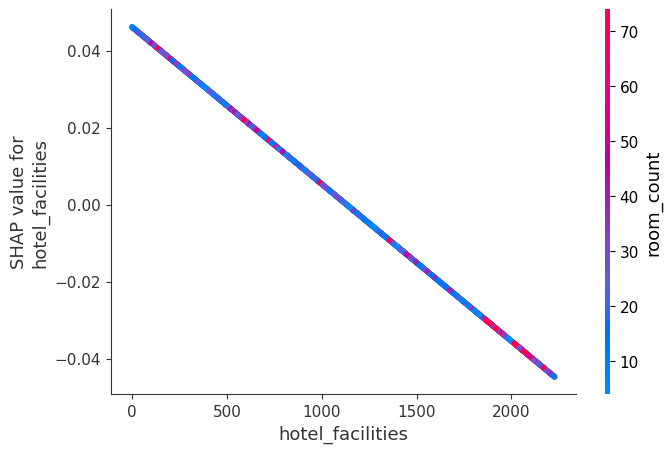

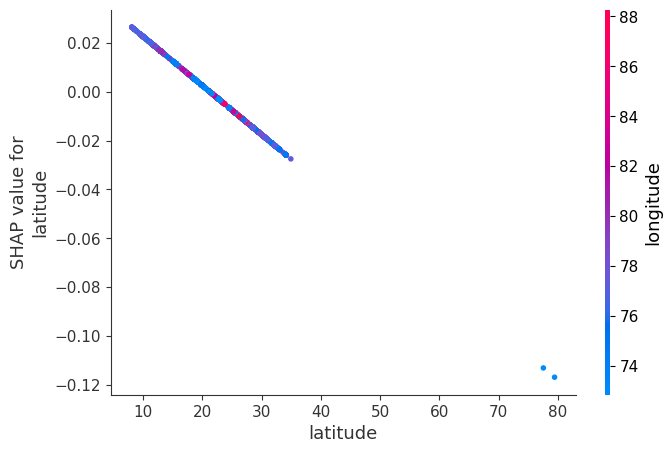

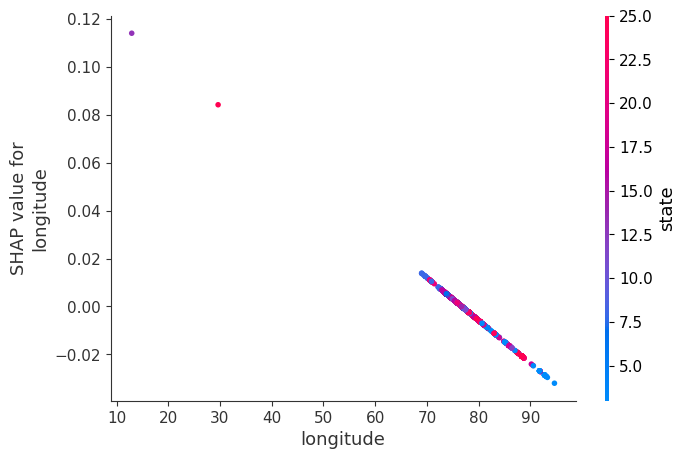

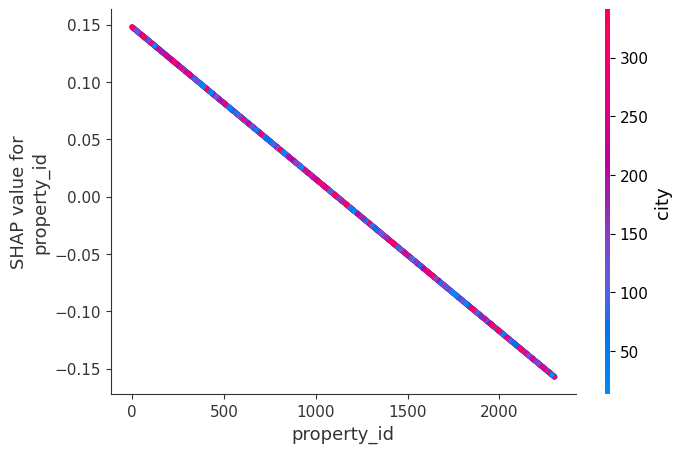

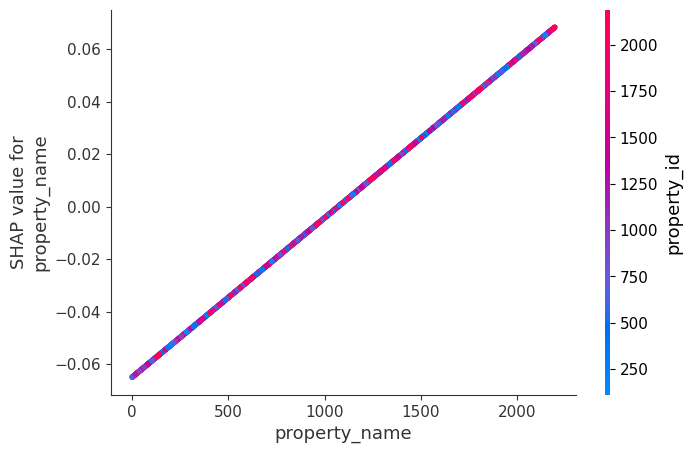

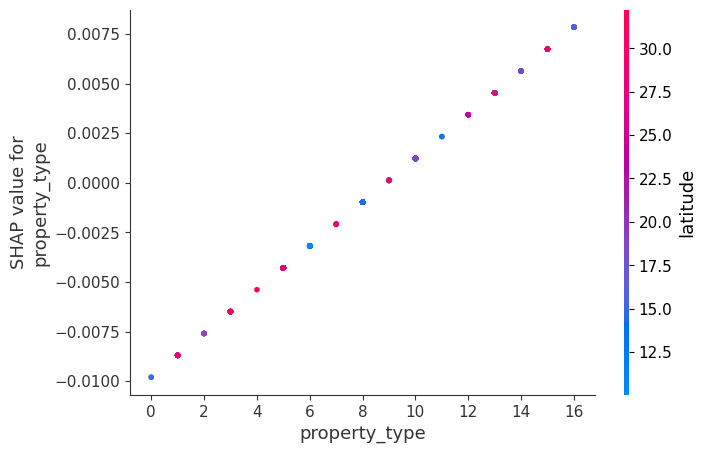

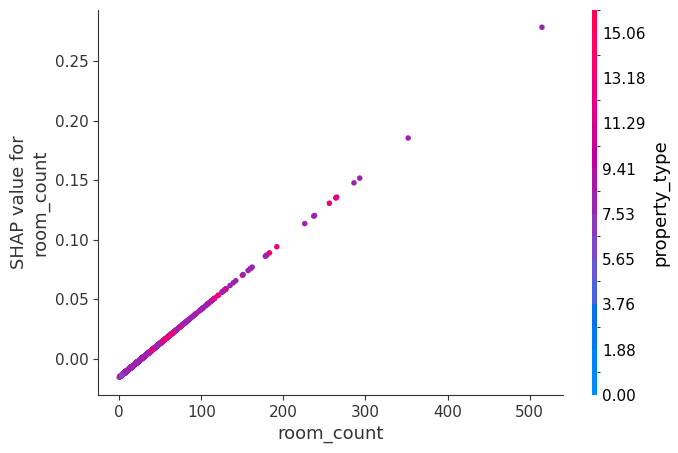

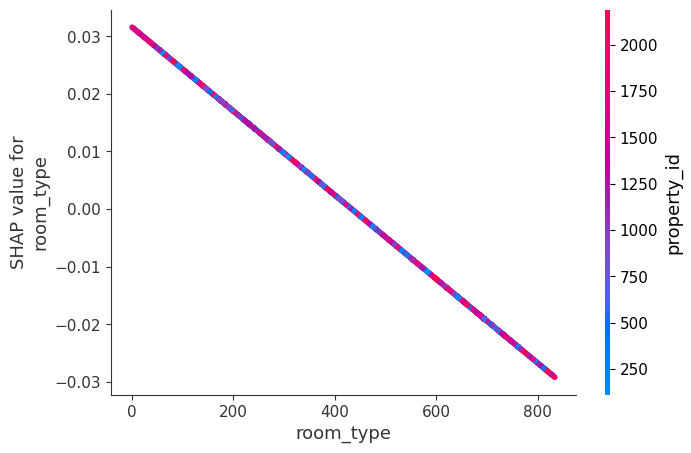

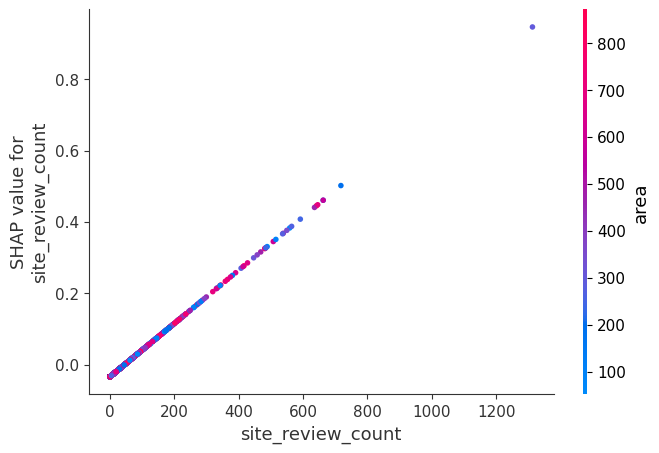

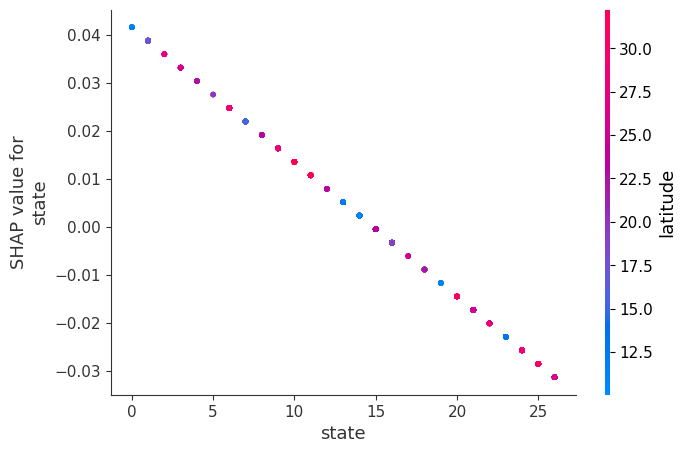

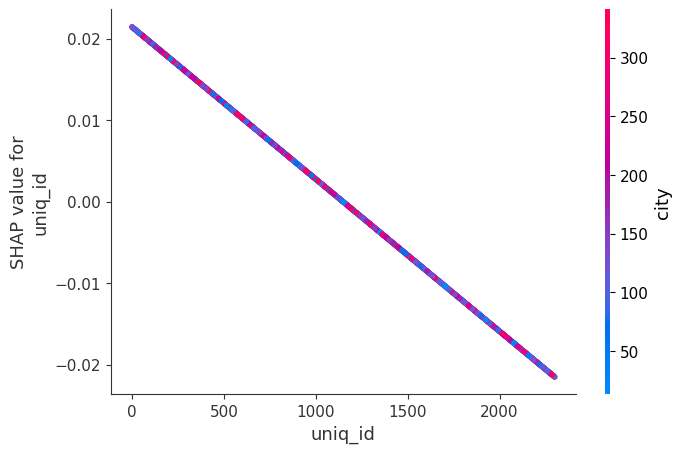

In [38]:
# SHAP partial dependence plot for linear model
for i in x_train.columns:
    shap.dependence_plot(i, linear_shap_values.values, x_train)

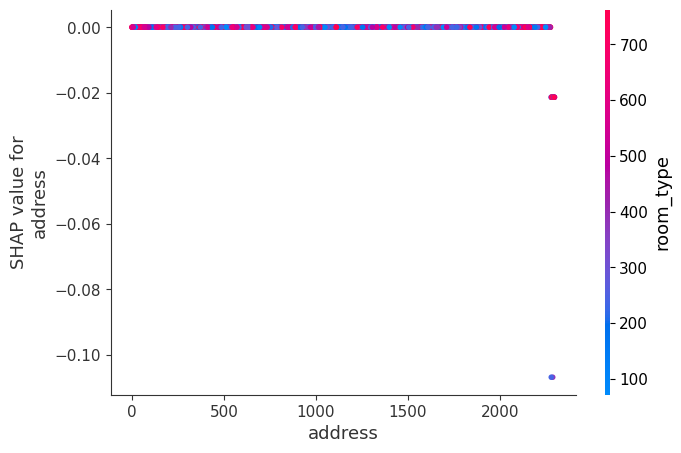

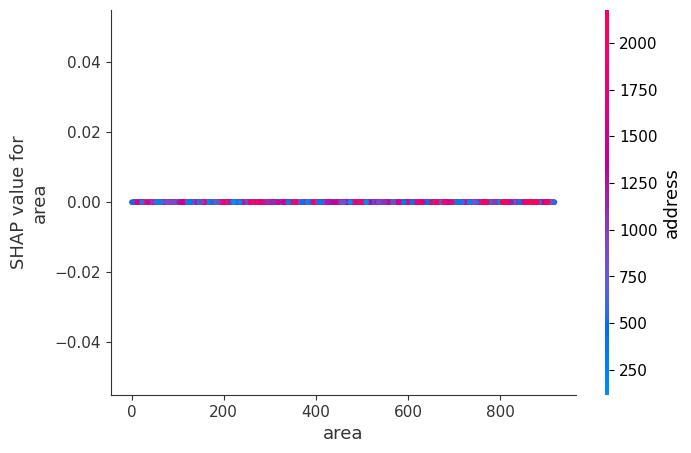

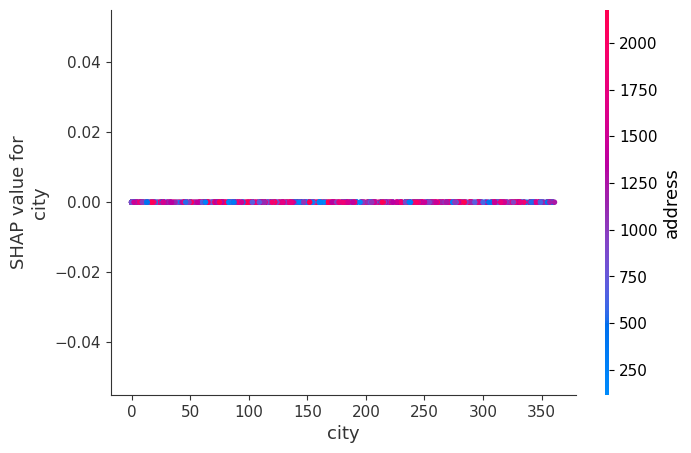

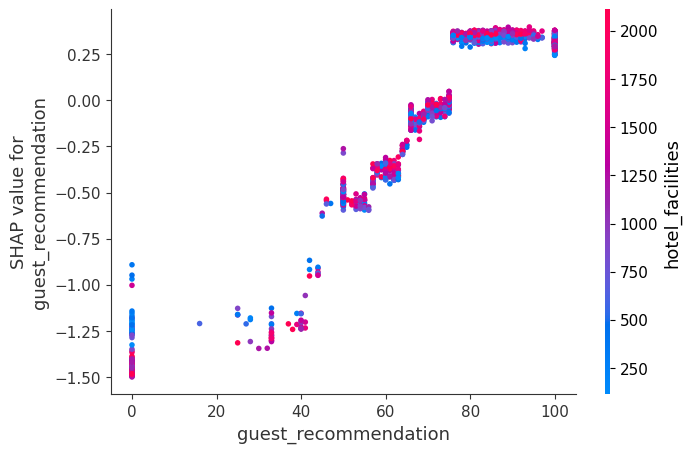

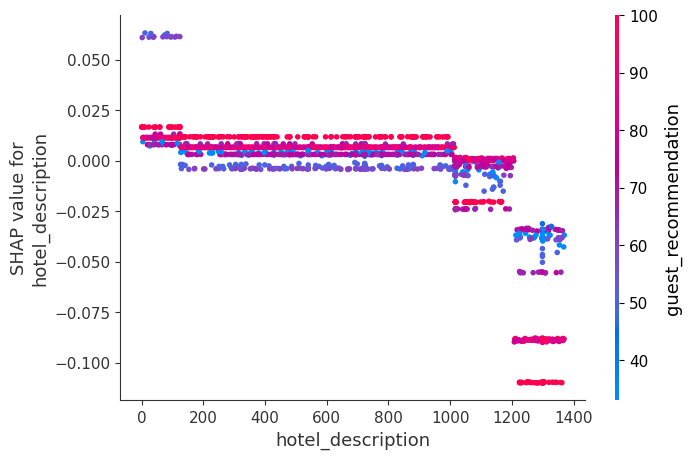

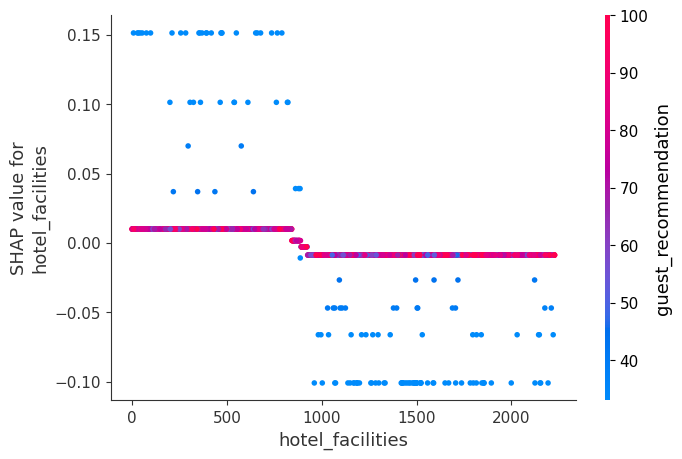

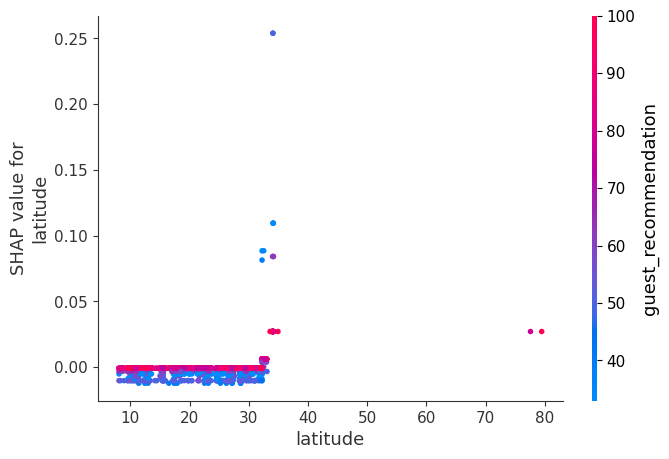

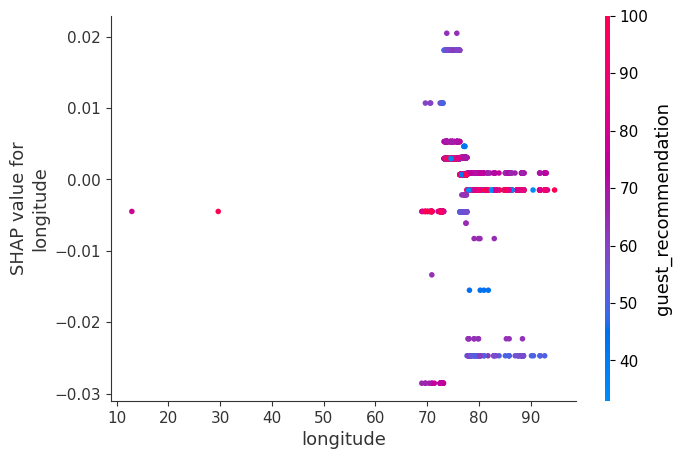

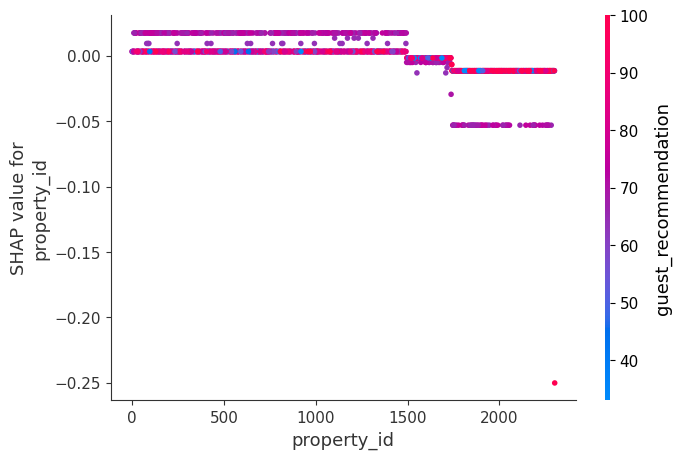

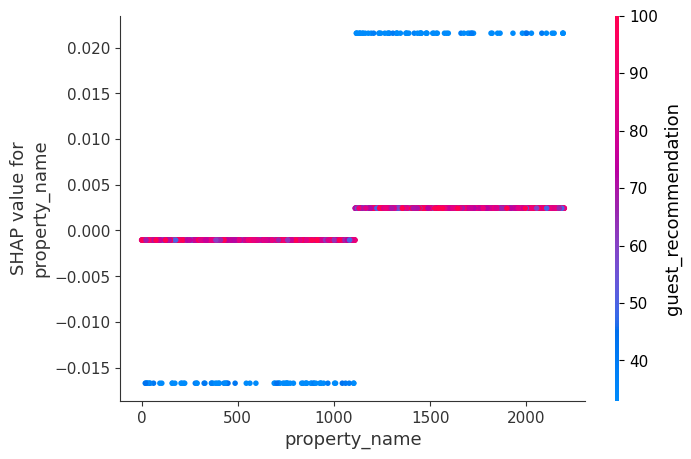

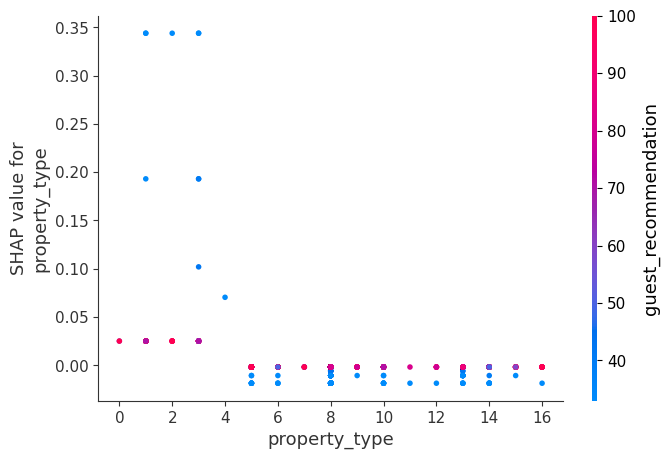

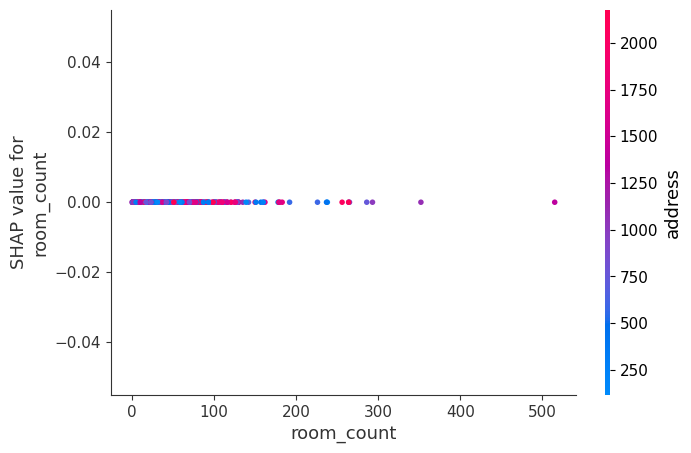

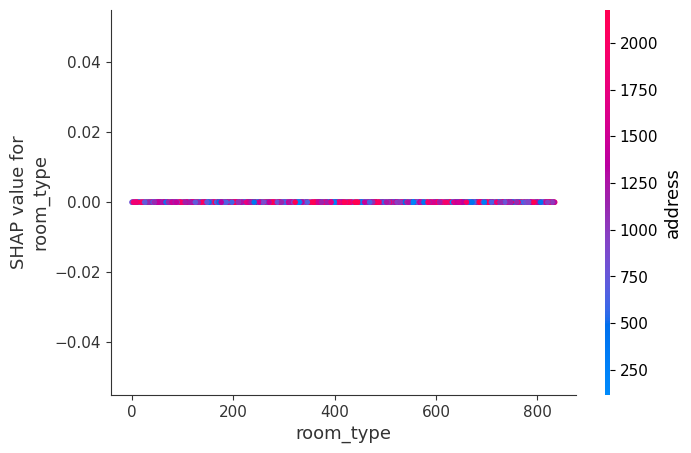

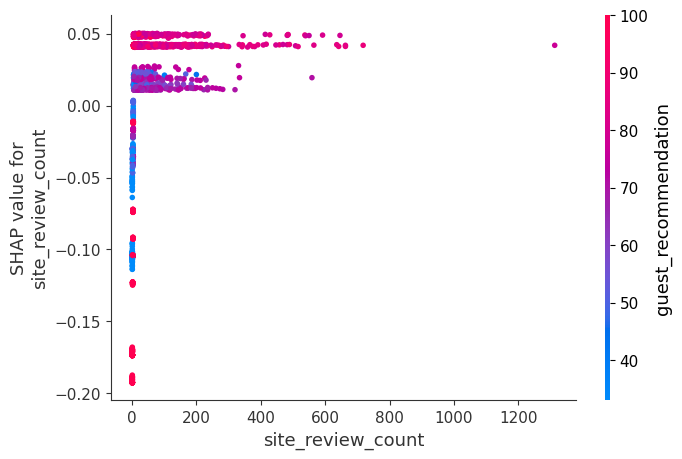

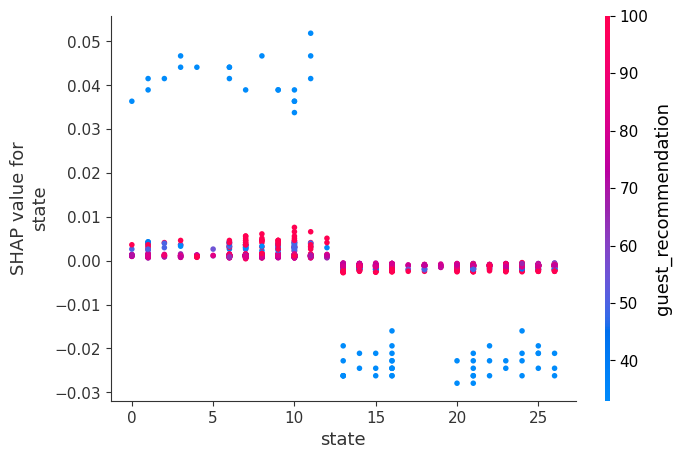

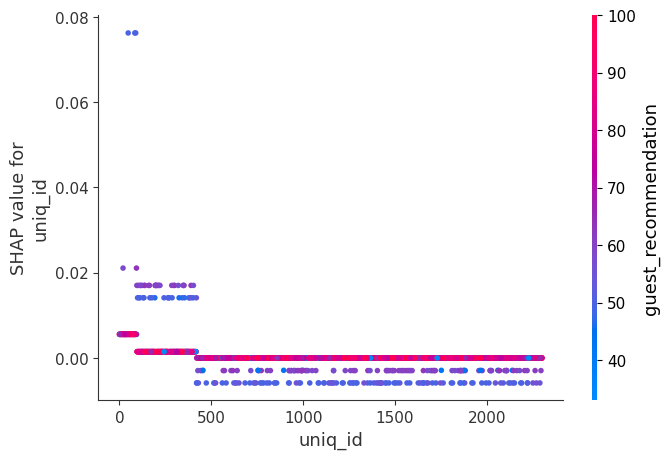

In [39]:
# SHAP partial dependence plot for a tree based model
for i in x_train.columns:
    shap.dependence_plot(i, tree_shap_values.values, x_train)

In [40]:
X_output_linear = x_test.copy()
X_output_linear.loc[:, "predict"] = np.round(
    linear_model.predict(X_output_linear), 2
)  # Attaching the output of linear model to test dataframe

X_output_tree = x_test.copy()
X_output_tree.loc[:, "predict"] = np.round(
    tree_model.predict(X_output_tree), 2
)  # Attaching the output of tree based model to test dataframe

# Force Plot SHAP analysis

The only distinction between this plot and the waterfall model we saw earlier is the simplified depiction. Whichever visualization a person prefers is ultimately up to them; some find the waterfall model simpler to read, while others find this one to be easier.

Let's look at a sample from the test set. The Force Plot is shown below.

The output of the model is 4.12

It gives us the same information which the waterfall model has to give



In [41]:
# Force Plot of Tree Based Model
shap.initjs() # Initializing JavaScript module
explainerModel = shap.TreeExplainer(tree_model)
shap_values_Model = explainerModel.shap_values(X_output_tree)


In [42]:
shap.force_plot(explainerModel.expected_value, shap_values_Model[0,:], X_output_tree.iloc[0,:])  # SHAP force plot for sample 18

# Heatmap Visualization for Linear and Tree-based model

The whole dataset's summary of how each data point in every feature affects the target (site_review_rating) is presented in this visualization.

The Features on the Y-axis and the Instance of that Feature X-axis are shown here.

The instance's color indicates whether it had a favorable or unfavorable effect.

A red instance indicates a positive influence, whereas a blue instance indicates a negative effect.

The color's intensity and the effect's intensity are exactly proportionate.

The feature has greater effect when the color is deeper.

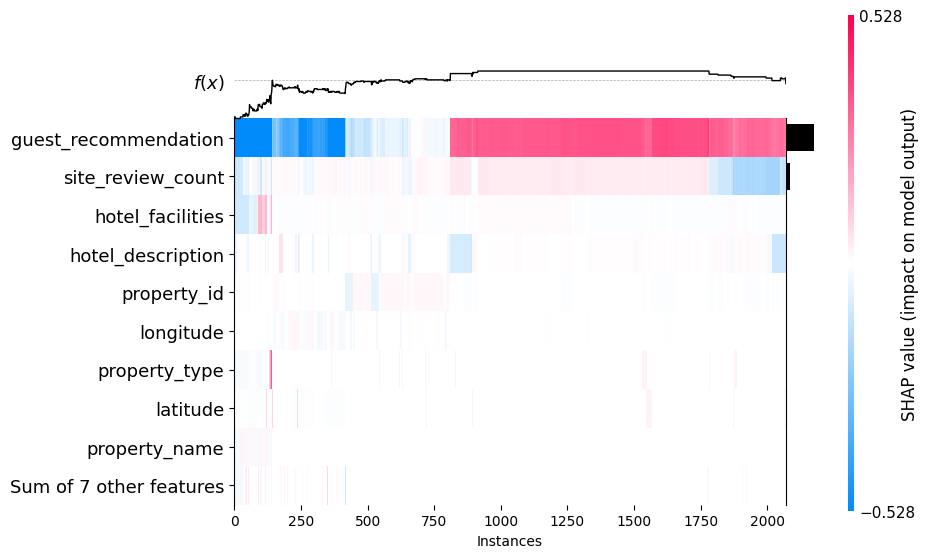

In [43]:
shap.plots.heatmap(tree_shap_values)  # SHAP HeatMap of a Tree Based Model

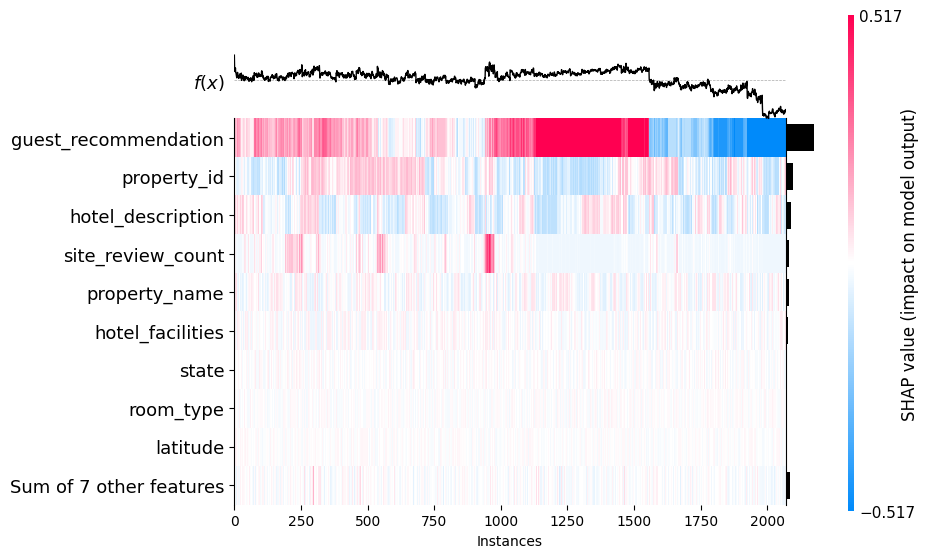

In [44]:
shap.plots.heatmap(linear_shap_values)  # SHAP heatmap for a Linear Model

# LIME (Local Interpretation Model-Agnostic Explanation) Analysis

LIME builds a surrogate model, i.e. converts a more complicated model (say a deep tree-based model into a simple linear model) around the data points in which we are interested and then it will try to make an approximation out of this simple model on the whole model. LIME builds a local model in such a way that it can interpret the whole Black-Box

LIME works well on tabular, text, image datasets - hence it works on different datasets

Let us Interpret our Linear model and Tree-based model on sample data (sample_index = 18) using LIME and try to understand what is happening under the hood. Please refer below for Visualizations of both models.
1. As we can see on the left-hand side LIME gives us information about the minimum and maximum values predicted by the model. The Color orange here represents positive and blue represents negative
2. most of the features like guest_recommendation, property_id, latitude, uniq_id, address and few more had a positive effect on the site_rating_count in both models
3. site_review_rating, room_type, hotel_description had a negative effect in the linear model but positive in tree-based model

These interpretations were carried out locally in the region where of out sample data(sample_index = 18).

# Linear Model

In [45]:
# Initializing LIME explainer for Linear Model
lime_linear_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train), feature_names=x_train.columns, mode="regression"
)


In [46]:
# Getting LIME interpretation for a sample data
idx = 18
np_x_test = np.array(x_test)
np_y_test = np.array(y_test)
print("Prediction : ", linear_model.predict(np_x_test[0].reshape(1, -1)))
print("Actual :     ", np_y_test[idx])

lime_linear_explanation = lime_linear_explainer.explain_instance(
    np_x_test[idx], linear_model.predict, num_features=np_x_test.shape[1]
)
lime_linear_explanation

X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names


Prediction :  [3.75006845]
Actual :      2.9


In [47]:
lime_linear_explanation.show_in_notebook()  # Display Results in Notebook

# Tree Based Model

In [48]:
# Initializing LIME explainer for Tree Based Model
lime_tree_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train), feature_names=x_train.columns, mode="regression"
)


In [49]:
# Getting LIME interpretation for a sample data
idx = 18
np_x_test = np.array(x_test)
np_y_test = np.array(y_test)
print("Prediction : ", tree_model.predict(np_x_test[0].reshape(1, -1)))
print("Actual :     ", np_y_test[idx])

lime_tree_explanation = lime_linear_explainer.explain_instance(
    np_x_test[idx], tree_model.predict, num_features=np_x_test.shape[1]
)
lime_tree_explanation


Prediction :  [4.12432393]
Actual :      2.9


X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names


In [50]:
lime_tree_explanation.show_in_notebook()  # Display Results in Notebook

# PDP(Partial Dependence Plot) for Linear model and Tree-based Model

Linear Model -
If we closely look at the PDP of the linear model we can see that if features guest_recommendation, site_review_count, property_name, hotel discription are tuned while freezing the rest if them the output of the model varies linearly and these variables have the most significant effect on the output(site_rating_count)

Tree-Based Model - On looking at the PDP of the tree-based model, it re-affirms the interpretation we got from the PDP of the Linear Model and Best AutoML model. The only difference here is that the output doesn't vary linearly

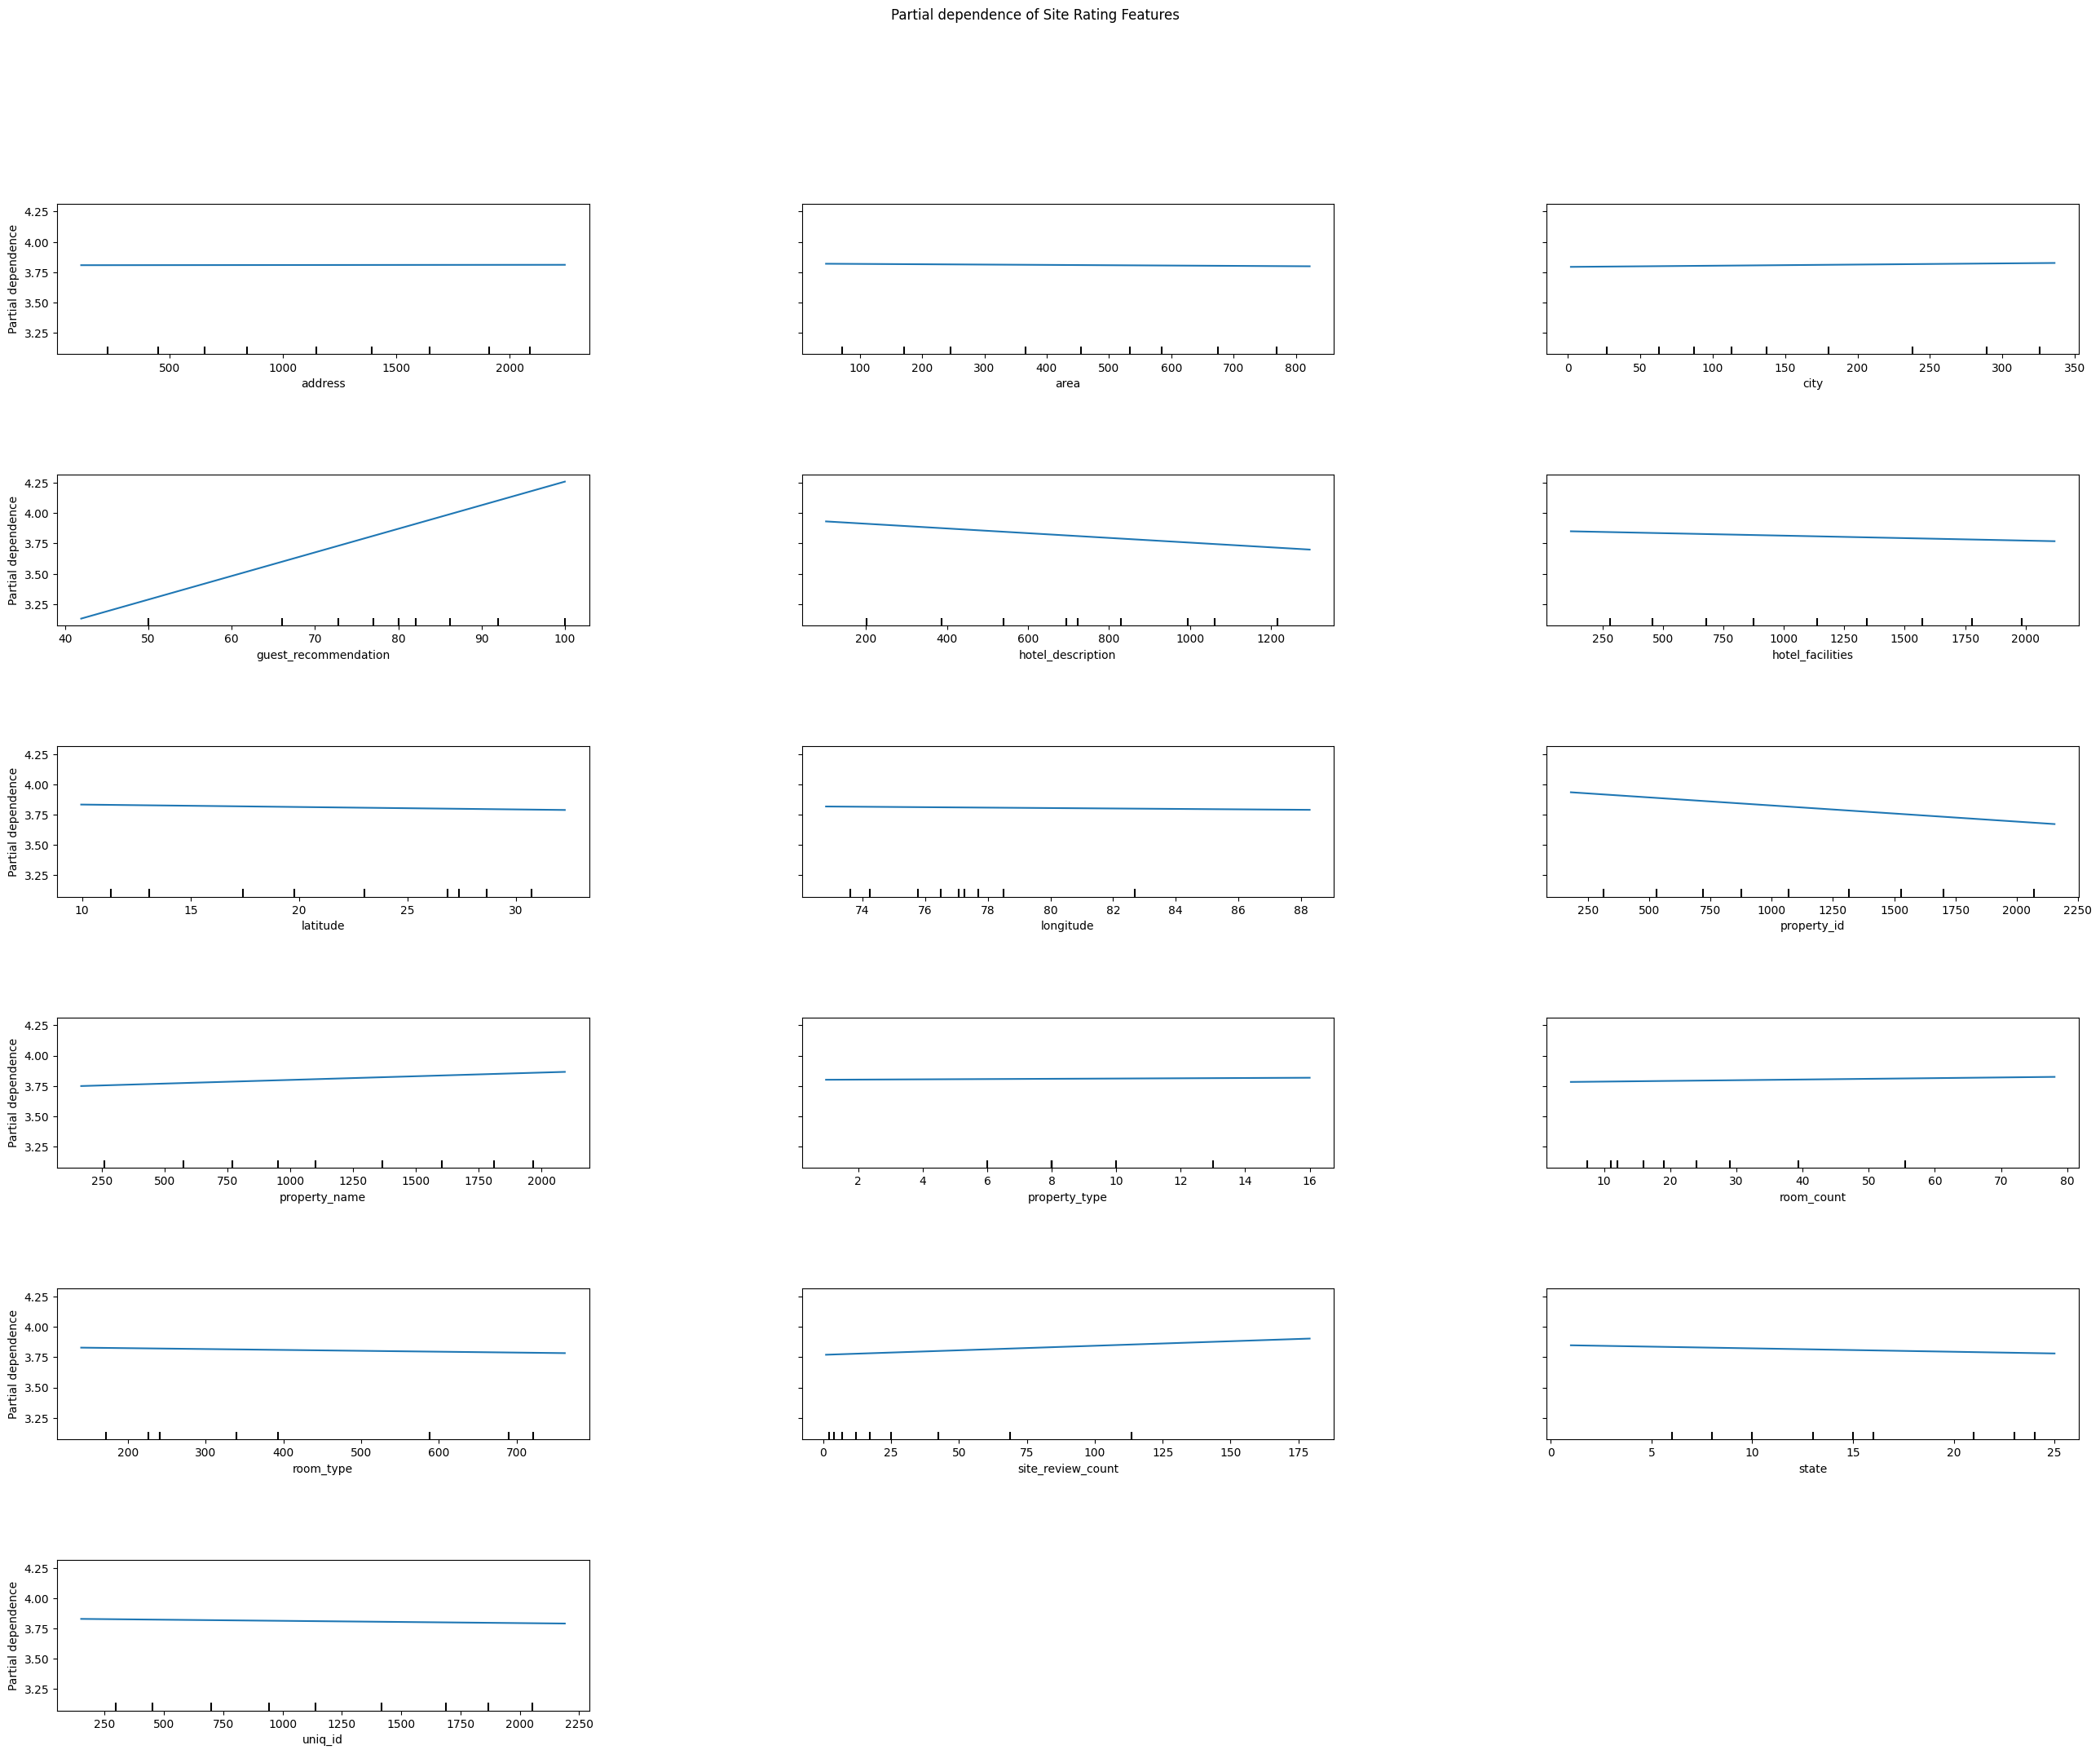

In [51]:
# PDP Plot for Linear Model
PartialDependenceDisplay.from_estimator(linear_model, x_test, x_test.columns, n_jobs=3, grid_resolution=20)


fig = plt.gcf()
fig.suptitle("Partial dependence of Site Rating Features")
fig.subplots_adjust(wspace=0.4, hspace=0.8)
plt.show()
plt.rcParams["figure.figsize"] = (32, 24)

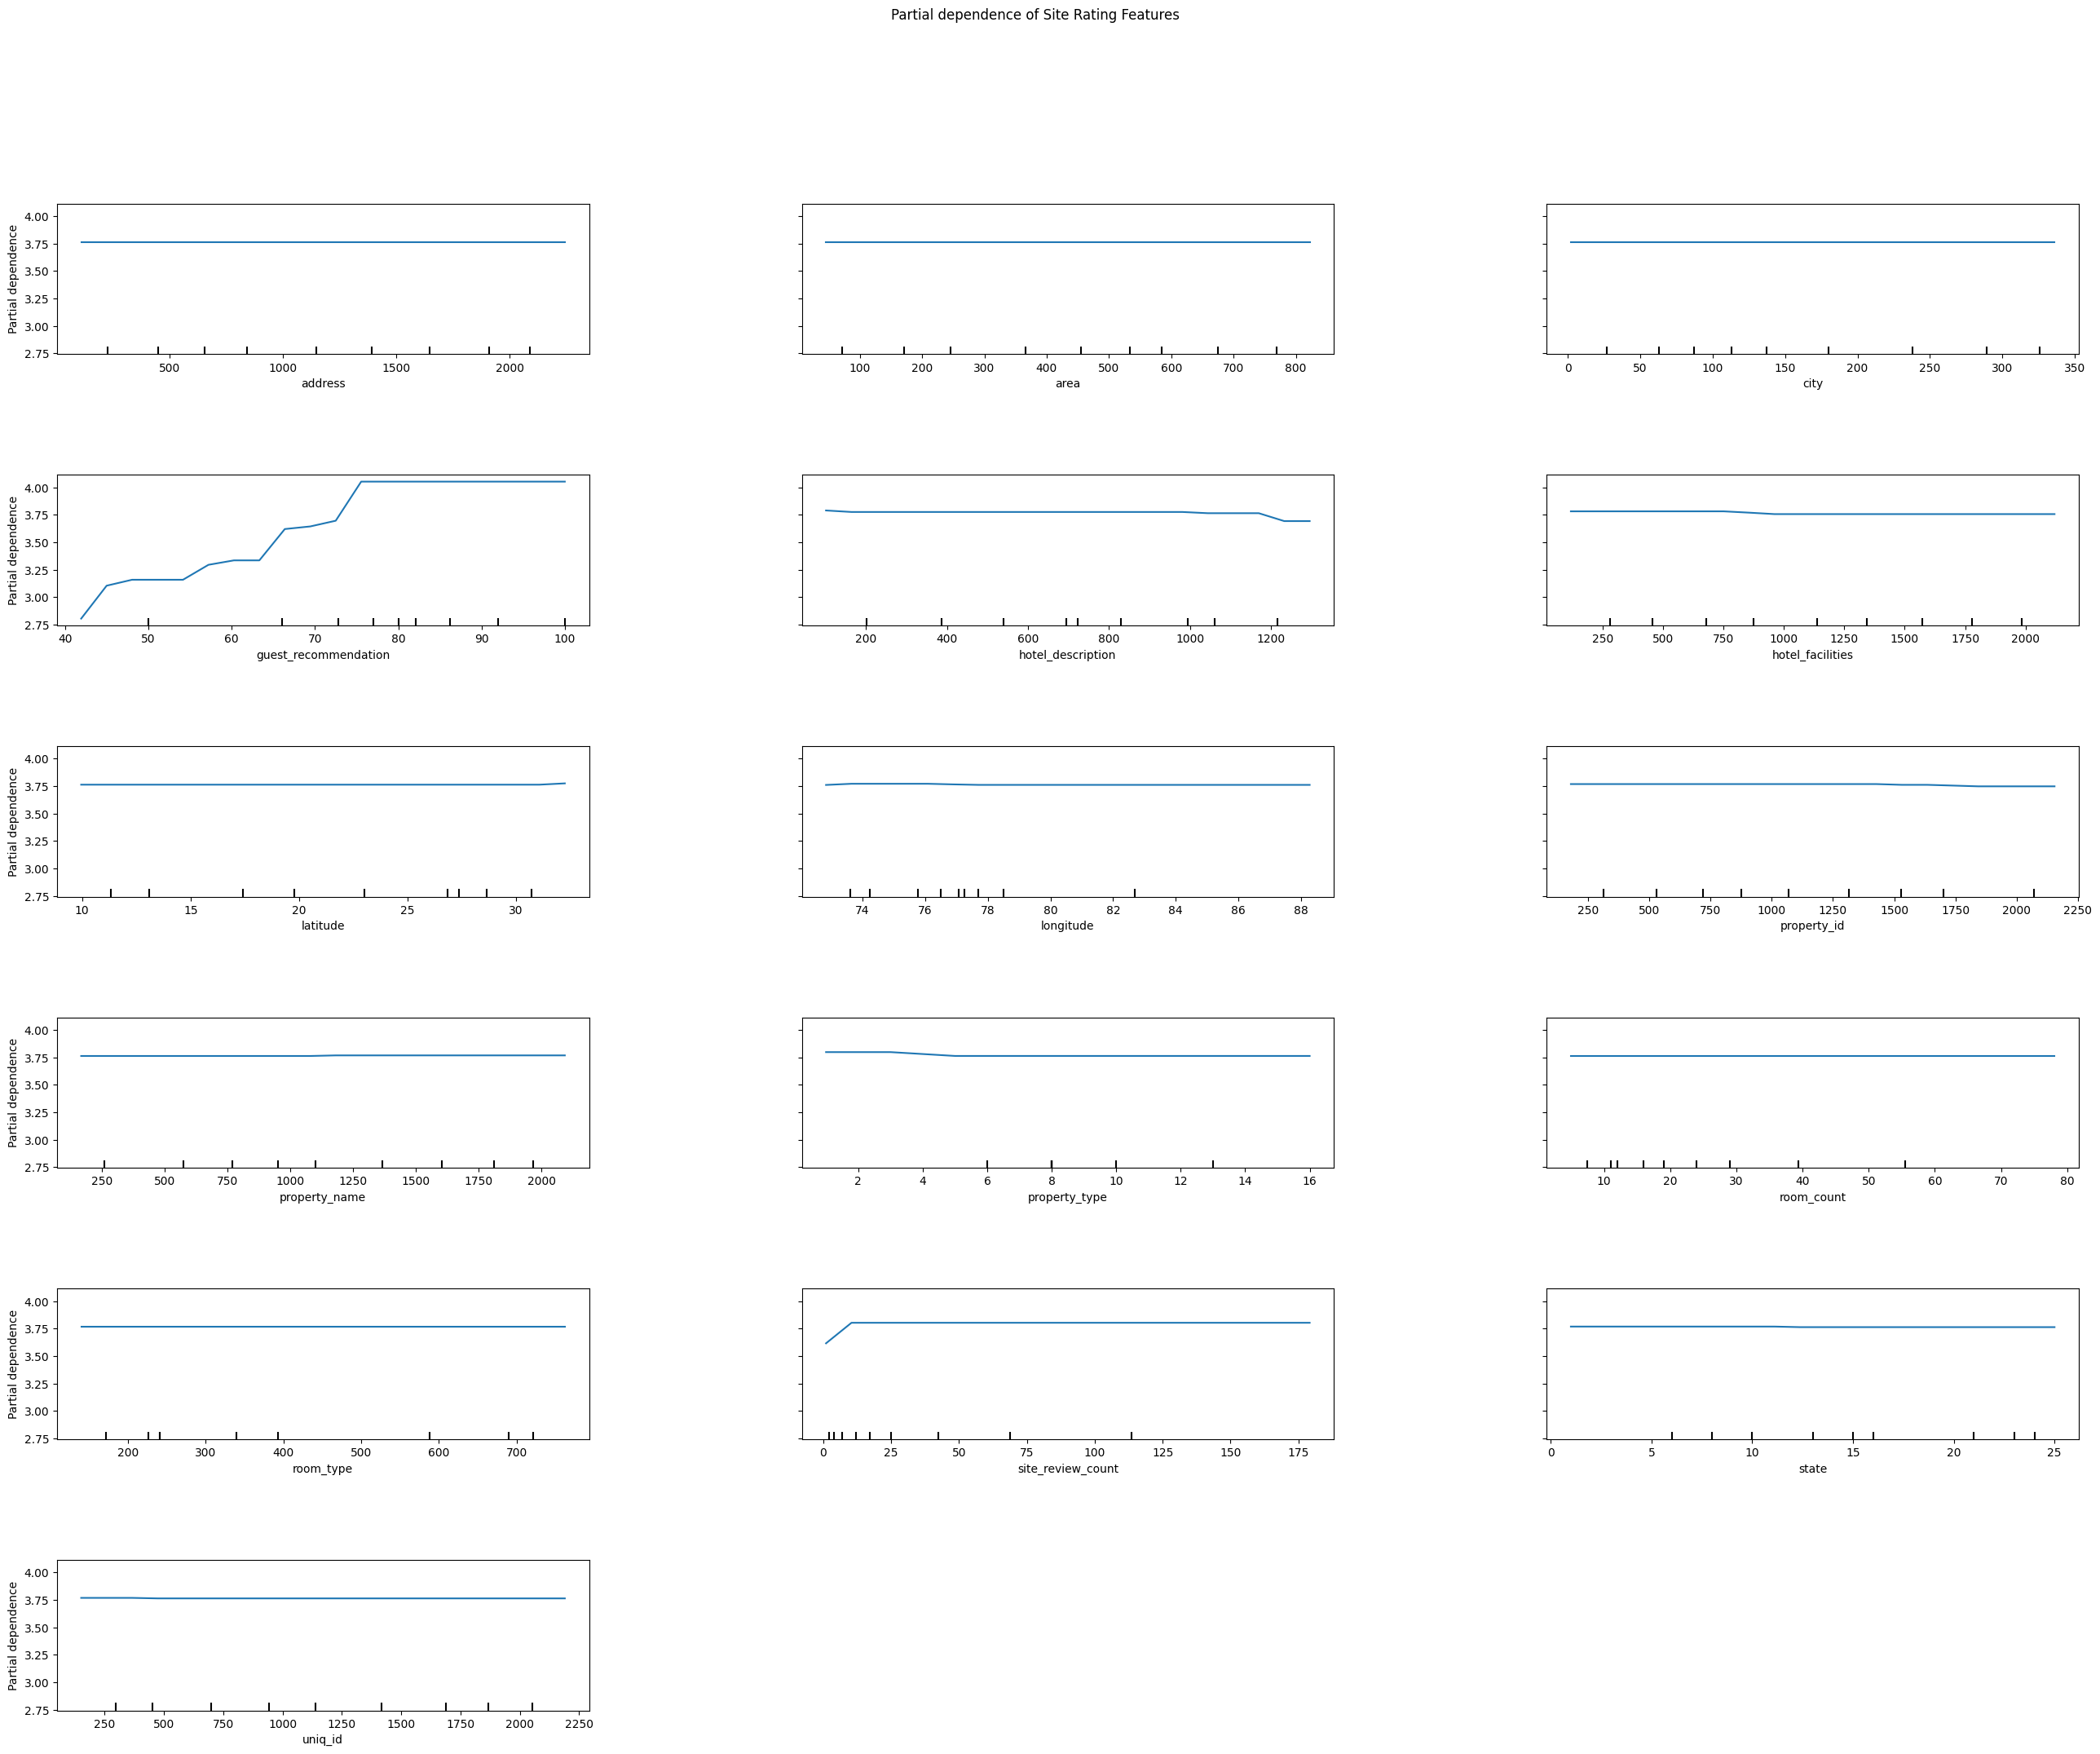

In [52]:
# PDP Plot for Tree based Model
PartialDependenceDisplay.from_estimator(tree_model, x_test, x_test.columns, n_jobs=3, grid_resolution=20)


fig = plt.gcf()
fig.suptitle("Partial dependence of Site Rating Features")
fig.subplots_adjust(wspace=0.4, hspace=0.8)
plt.show()
plt.rcParams["figure.figsize"] = (32, 24)

# Comparision between SHAP, LIME, and Partial Dependence Plot Analysis

Unlike LIME, SHAP does not necessarily build a local interpretable model but rather uses the black-box model to calculate the marginal contribution to the prediction for each feature and then relies on the theoretically sound game theory concept of Shapley values to calculate the feature importance. In this way, SHAP improves upon LIME due to its greater stability and lack of local linear model assumptions.

PDP gives the extent of effect a variable has on the output by freezing the rest of them

SHAP gives how much each variable contributes to the prediction

LIME is more like SHAP but a lite version of it - It takes the local region of the point of interest and gives us information about the contribution each variable has made to the output

We have to analyze our needs and then consider the tradeoff to select the best suitable interpretable method for the ML model

# Conclusion

For this dataset the best model according to AutoML is xgboost. The regression analysis techniques like Tree model and linear model. Plotted Graphs, heatmaps,waterfalls and compared lime,Shap and partial dependences. Using Lime analysis we got prediction 4.12 out of 5. On the other hand when Linear Regression was implemented the accuracy for training data was 69.8 percent. After implementing these model I calculated SHAP values using SHAP analysis method. I plotted different plots like permutation plots, waterfall plot, feature importance bar chart and many more plots.

The important features for this model was guest recommendation. This means that for this model the target variable 'Site_review_rating' is highly depended on hotel_description, property_id, property_name, guest_recommendation site_review_count.

# References



1. W3schools

2. Professor's reference Notebook- https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb 

3 .https://towardsdatascience.com/

4. https://medium.com/@kalia_65609/interpreting-an-nlp-model-with-lime-and-shap-834ccfa124e4#:~:text=Unlike%20LIME%2C%20SHAP%20does%20not,to%20calculate%20the%20feature%20importance.

5. https://www.youtube.com/@adataodyssey

